In [1]:
import pandas as pd
import numpy as np
from cycling_manager.main import *
from cycling_manager.sequences import get_sequence
import cv2

In [2]:
df, train, test = preproc(2017, 2022)

full df shape (603619, 25)
full df shape (603619, 25)
Score vertical meters - model: DecisionTreeRegressor() score: 0.9995709896880515
(336139, 25)


/Users/michieldekoninck/code/Michiel-DK/cycling_manager/cycling_manager/preprocess.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vert_na.dropna(subset=['Distance:', 'ProfileScore:'], how='any', inplace=True)
/Users/michieldekoninck/code/Michiel-DK/cycling_manager/cycling_manager/preprocess.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vert_na['predicted_vert'] = tree.predict(X_pred_scaled)


Score vertical meters - model: DecisionTreeRegressor() score: 0.9999236356458473


/Users/michieldekoninck/code/Michiel-DK/cycling_manager/cycling_manager/preprocess.py:128: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  impute_profile = profile_na.append(smaller_ten)
/Users/michieldekoninck/code/Michiel-DK/cycling_manager/cycling_manager/preprocess.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  px0.dropna(subset = ['ProfileScore:', 'Vert. meters:'], how='any', inplace=True)


Score vertical meters - model: KNeighborsClassifier() score: 0.9937210531223774


/Users/michieldekoninck/code/Michiel-DK/cycling_manager/cycling_manager/preprocess.py:173: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p0.dropna(subset = ['ProfileScore:', 'Vert. meters:'], how='any', inplace=True)
/Users/michieldekoninck/code/Michiel-DK/cycling_manager/cycling_manager/preprocess.py:181: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p0['adjusted parcours type'] = labels



Processing done...


In [3]:
train

,name,year,race_name
1997,frederik-frison,2021,vuelta-a-espana
1628,jack-haig,2021,tour-de-france
1634,bauke-mollema,2021,giro-d-italia
1633,vincenzo-nibali,2021,giro-d-italia
1632,dan-martin,2021,giro-d-italia
...,...,...,...
1278,tony-gallopin,2018,vuelta-a-espana
1279,vincenzo-nibali,2018,vuelta-a-espana
1280,gorka-izagirre,2018,vuelta-a-espana
1281,ion-izagirre,2018,vuelta-a-espana


In [4]:
small_df = df[df['year']<2021]
small_train = train[train['year']<2021]
small_df

,name,year,type,date,result,gc,icon,race_ref,race_name,race_detail,...,Race category:,Points scale:,Arrival:,Won how:,parcours_type_num,gt_binary,key,result_bin,types_bin,icon_bin
1,andrey-amador,2020,etappe,2020-09-16,117,79.0,stage,race/tour-de-france/2020/stage-17,tour-de-france,Stage 17 - Grenoble › Méribel - Col de la Loze,...,NaN,NaN,NaN,NaN,5.0,1,andrey-amador-2020-tour-de-france,0.0,0,0
2,richard-carapaz,2020,etappe,2020-09-16,11,13.0,stage,race/tour-de-france/2020/stage-17,tour-de-france,Stage 17 - Grenoble › Méribel - Col de la Loze,...,NaN,NaN,NaN,NaN,5.0,1,richard-carapaz-2020-tour-de-france,1.0,0,0
3,jonathan-castroviejo,2020,etappe,2020-09-16,116,40.0,stage,race/tour-de-france/2020/stage-17,tour-de-france,Stage 17 - Grenoble › Méribel - Col de la Loze,...,NaN,NaN,NaN,NaN,5.0,1,jonathan-castroviejo-2020-tour-de-france,0.0,0,0
4,michal-kwiatkowski,2020,etappe,2020-09-16,130,37.0,stage,race/tour-de-france/2020/stage-17,tour-de-france,Stage 17 - Grenoble › Méribel - Col de la Loze,...,NaN,NaN,NaN,NaN,5.0,1,michal-kwiatkowski-2020-tour-de-france,0.0,0,0
5,luke-rowe,2020,etappe,2020-09-16,131,133.0,stage,race/tour-de-france/2020/stage-17,tour-de-france,Stage 17 - Grenoble › Méribel - Col de la Loze,...,NaN,NaN,NaN,NaN,5.0,1,luke-rowe-2020-tour-de-france,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599491,carlos-jose-ochoa,2009,etappe,2009-01-07,22,NaN,stage,race/vuelta-al-tachira/2009/stage-2,vuelta-al-tachira,Stage 2 - El Tocuyo › Acarigua,...,NaN,NaN,NaN,NaN,NaN,0,carlos-jose-ochoa-2009-vuelta-al-tachira,0.0,0,0
599492,jackson-rodriguez,2009,etappe,2009-01-07,30,NaN,stage,race/vuelta-al-tachira/2009/stage-2,vuelta-al-tachira,Stage 2 - El Tocuyo › Acarigua,...,NaN,NaN,NaN,NaN,NaN,0,jackson-rodriguez-2009-vuelta-al-tachira,0.0,0,0
599493,carlos-jose-ochoa,2009,etappe,2009-01-06,94,NaN,stage,race/vuelta-al-tachira/2009/stage-1,vuelta-al-tachira,Stage 1 - Circuito El Tocuyo › Circuito El Tocuyo,...,NaN,NaN,NaN,NaN,NaN,0,carlos-jose-ochoa-2009-vuelta-al-tachira,0.0,0,0
599494,jackson-rodriguez,2009,etappe,2009-01-06,67,NaN,stage,race/vuelta-al-tachira/2009/stage-1,vuelta-al-tachira,Stage 1 - Circuito El Tocuyo › Circuito El Tocuyo,...,NaN,NaN,NaN,NaN,NaN,0,jackson-rodriguez-2009-vuelta-al-tachira,0.0,0,0


In [7]:
master_ls = []

for rider, year, tour in train.values:
    y_decoder, tour, season = get_sequence(df, rider, year, tour, img=True)
    
    ss_new = ["_".join(x.split('/')[1:])+'.jpg' for x in season]
    
    #all_imgs = os.listdir('../raw_data/img')

    ls = []

    for race in ss_new:
        try:
            path = '../raw_data/img/' + race
            #print(path)
            img = cv2.imread(path)
            resized = cv2.resize(img, (725,310))
            ls.append(resized)
        except Exception as e:
            print(race)
            print(e)
    master_ls.append(ls)

[ WARN:0@199.800] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium-itt_2020_result.jpg'): can't open/read file: check file path/integrity


nc-belgium-itt_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@200.046] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium-itt_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@200.047] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2021_result.jpg'): can't open/read file: check file path/integrity


nc-belgium-itt_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-belgium_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@200.923] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2020_result.jpg'): can't open/read file: check file path/integrity


nc-italy_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@202.061] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2020_result.jpg'): can't open/read file: check file path/integrity


nc-italy_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@203.792] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@204.055] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@204.235] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2021_result.jpg'): can't open/read file: check file path/integrity


nc-france_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-belgium_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@204.321] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-south-africa_2021_result.jpg'): can't open/read file: check file path/integrity


nc-south-africa_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@204.824] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@204.979] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2021_result.jpg'): can't open/read file: check file path/integrity


nc-belgium_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-belgium_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-italy_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@205.536] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2020_result.jpg'): can't open/read file: check file path/integrity


nc-italy-itt_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@207.631] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy-itt_2020_result.jpg'): can't open/read file: check file path/integrity


nc-france_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@208.964] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@209.921] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2020_result.jpg'): can't open/read file: check file path/integrity


nc-italy_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@210.384] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@210.508] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2020_result.jpg'): can't open/read file: check file path/integrity


nc-france_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@210.793] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@211.025] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@211.133] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@211.133] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-2.jpg'): can't open/read

nc-belgium_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

australian-open-road-championships-itt_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-run

[ WARN:0@211.468] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2020_result.jpg'): can't open/read file: check file path/integrity


nc-france_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@211.714] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@211.834] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2020_result.jpg'): can't open/read file: check file path/integrity


nc-france_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@212.098] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@212.239] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@212.441] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2021_result.jpg'): can't open/read file: check file path/integrity


nc-france_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@212.834] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/danish-championships_2021_result.jpg'): can't open/read file: check file path/integrity


danish-championships_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@213.667] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2020_result.jpg'): can't open/read file: check file path/integrity


nc-italy_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@214.002] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2021_result.jpg'): can't open/read file: check file path/integrity


nc-italy_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@214.438] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@214.796] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-norway_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@214.922] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2020_result.jpg'): can't open/read file: check file path/integrity


nc-norway_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@215.162] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2021_result.jpg'): can't open/read file: check file path/integrity


nc-france_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

danish-championships_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-germany_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@215.475] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/danish-championships_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@215.623] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-germany_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@216.584] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-austria_2020_result.jpg'): can't open/read file: check file path/integrity


nc-austria_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@216.794] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-austria_2021_result.jpg'): can't open/read file: check file path/integrity


nc-austria_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@217.206] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-slovakia_2021_result.jpg'): can't open/read file: check file path/integrity


nc-slovakia_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@217.525] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-germany-itt_2021_result.jpg'): can't open/read file: check file path/integrity


nc-germany-itt_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@218.666] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2020_result.jpg'): can't open/read file: check file path/integrity


nc-belgium_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-belgium_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@219.258] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@219.446] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2021_result.jpg'): can't open/read file: check file path/integrity


czech-cycling-tour_2020_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-belgium-itt_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/openc

[ WARN:0@219.528] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@219.528] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@219.528] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-3.jpg'): can't open/read file: check file path/integrity
[ WARN:0@219.528] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-4.jpg

nc-belgium-itt_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-belgium_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@220.236] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-germany_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@220.296] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-slovenia_2020_result.jpg'): can't open/read file: check file path/integrity


nc-germany_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-slovenia_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@220.709] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2020_result.jpg'): can't open/read file: check file path/integrity


danish-championships_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@222.065] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/danish-championships_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@222.479] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2020_result.jpg'): can't open/read file: check file path/integrity


nc-belgium_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@223.238] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2020_result.jpg'): can't open/read file: check file path/integrity


nc-belgium_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@223.972] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2020_result.jpg'): can't open/read file: check file path/integrity


nc-belgium_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@225.462] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2020_result.jpg'): can't open/read file: check file path/integrity


nc-italy_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@228.313] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@228.932] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2020_result.jpg'): can't open/read file: check file path/integrity


nc-france_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@229.421] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-hungary-itt_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@229.421] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-hungary_2020_result.jpg'): can't open/read file: check file path/integrity


nc-hungary-itt_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-hungary_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@229.866] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@229.866] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@229.866] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-3.jpg'): can't open/read file: check file path/integrity


czech-cycling-tour_2020_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@230.196] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-poland-itt_2020_result.jpg'): can't open/read file: check file path/integrity


nc-poland-itt_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-switserland_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@231.604] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-switserland_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@231.965] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy-itt_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@231.965] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2020_result.jpg'): can't open/read file: check file path/integrity


nc-italy-itt_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-italy_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@233.459] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2020_result.jpg'): can't open/read file: check file path/integrity


nc-spain_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-spain_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@233.844] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2020_result.jpg'): can't open/read file: check file path/integrity


czech-cycling-tour_2020_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-italy-itt_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-

[ WARN:0@234.392] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@234.392] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@234.392] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-3.jpg'): can't open/read file: check file path/integrity
[ WARN:0@234.393] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-4.jpg

czech-cycling-tour_2020_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-italy_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-pyth

[ WARN:0@235.393] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@235.686] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-slovenia_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@235.690] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@235.690] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-2.jpg'): can't open/read

nc-slovenia_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-p

[ WARN:0@236.209] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2020_result.jpg'): can't open/read file: check file path/integrity


nc-italy_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@236.560] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2020_result.jpg'): can't open/read file: check file path/integrity


nc-italy_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@238.341] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2020_result.jpg'): can't open/read file: check file path/integrity


nc-france_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@238.547] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2021_result.jpg'): can't open/read file: check file path/integrity


nc-france_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@238.881] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@239.151] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2021_result.jpg'): can't open/read file: check file path/integrity


nc-france_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@240.276] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-germany_2021_result.jpg'): can't open/read file: check file path/integrity


nc-germany_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-germany_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

danish-championships_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@242.003] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-germany_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@242.105] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/danish-championships_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@242.411] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/danish-championships_2021_result.jpg'): can't open/read file: check file path/integrity


danish-championships_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-belgium_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-belgium_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@242.647] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@242.763] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2021_result.jpg'): can't open/read file: check file path/integrity


nc-belgium_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-belgium_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@243.034] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@243.148] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@243.552] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy-itt_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@243.552] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2021_result.jpg'): can't open/read file: check file

nc-italy-itt_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-italy_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-italy_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@244.366] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-austria_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@244.498] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2020_result.jpg'): can't open/read file: check file path/integrity


nc-austria_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-italy_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@244.771] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2021_result.jpg'): can't open/read file: check file path/integrity


nc-italy_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-germany-itt_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-germany_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-pyth

[ WARN:0@245.186] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-germany-itt_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@245.186] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-germany_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@245.319] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@245.319] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-2.jpg'): can't open

nc-austria_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-netherlands-itt_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@245.523] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-austria_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@245.721] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-netherlands-itt_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@245.848] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2020_result.jpg'): can't open/read file: check file path/integrity


nc-france_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france-itt_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@246.127] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@246.313] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france-itt_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@246.313] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@246.423] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-switzerland-itt_2020_result.jpg'): can't open/read file: c

nc-switzerland-itt_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-switserland_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-switzerland-itt_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@246.724] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-switzerland-itt_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@246.860] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@247.111] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@247.203] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2020_result.jpg'): can't open/read file: check

nc-france_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-spain_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@247.534] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@247.745] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@248.295] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2020_result.jpg'): can't open/read file: check file path/integrity


nc-spain_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@248.561] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@248.653] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2020_result.jpg'): can't open/read file: check file path/integrity


nc-spain_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france-itt_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@248.956] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france-itt_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@249.131] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2020_result.jpg'): can't open/read file: check file path/integrity


nc-france-itt_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

la-tropicale-amissa-bongo_2020_stage-5.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@249.342] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france-itt_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@249.342] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@249.404] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/la-tropicale-amissa-bongo_2020_stage-5.jpg'): can't open/read file: check file path/integrity
[ WARN:0@249.460] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2020_result.jpg'): can't open/read

nc-belgium_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

danish-championships_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-denmark-itt_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-denmark-itt_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

danish-championships_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/ope

[ WARN:0@250.225] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-denmark-itt_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@250.383] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-denmark-itt_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@250.383] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/danish-championships_2021_result.jpg'): can't open/read file: check file path/integrity


nc-france_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@250.547] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2020_result.jpg'): can't open/read file: check file path/integrity


nc-france_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@250.786] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@251.029] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@251.220] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2021_result.jpg'): can't open/read file: check file path/integrity


nc-belgium_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-belgium_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@251.916] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-denmark-itt_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@251.916] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/danish-championships_2021_result.jpg'): can't open/read file: check file path/integrity


nc-denmark-itt_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

danish-championships_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@252.223] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2020_result.jpg'): can't open/read file: check file path/integrity


nc-italy_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@252.523] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2021_result.jpg'): can't open/read file: check file path/integrity


nc-italy_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@252.876] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-switzerland-itt_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@252.876] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-switserland_2021_result.jpg'): can't open/read file: check file path/integrity


nc-switzerland-itt_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-switserland_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-belgium-itt_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-belgium_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@254.156] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium-itt_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@254.341] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2021_result.jpg'): can't open/read file: check file path/integrity


nc-netherlands_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@254.871] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-netherlands_2021_result.jpg'): can't open/read file: check file path/integrity


nc-belgium_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-belgium_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@256.918] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@257.047] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@258.459] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-israel-itt_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@258.459] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-israel_2021_result.jpg'): can't open/read file: check fi

nc-israel-itt_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-israel_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@259.984] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2020_result.jpg'): can't open/read file: check file path/integrity


nc-france_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@260.267] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2021_result.jpg'): can't open/read file: check file path/integrity


danish-championships_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@261.238] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/danish-championships_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@261.464] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/danish-championships_2021_result.jpg'): can't open/read file: check file path/integrity


danish-championships_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@261.828] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-latvia-itt_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@261.828] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-latvia_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@261.955] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-switserland_2021_result.jpg'): can't open/read file: check file path/integrity


nc-latvia-itt_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-latvia_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-switserland_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@262.123] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2021_result.jpg'): can't open/read file: check file path/integrity


nc-belgium_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@262.469] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2021_result.jpg'): can't open/read file: check file path/integrity


nc-spain_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-belgium_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@262.657] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@263.647] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/australian-open-road-championships-itt_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@263.647] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-australia_2021_result.jpg'): can't open/read file: check file path/integrity


australian-open-road-championships-itt_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-australia_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-slovenia_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-spain_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@264.541] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-slovenia_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@264.757] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2021_result.jpg'): can't open/read file: check file path/integrity


nc-spain-itt_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-spain_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@265.170] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain-itt_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@265.171] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@266.126] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain-itt_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@266.126] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2021_result.jpg'): can't open/read file: check file

nc-spain-itt_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-spain_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@267.095] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-slovenia_2020_result.jpg'): can't open/read file: check file path/integrity


nc-slovenia_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@267.387] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-slovenia_2021_result.jpg'): can't open/read file: check file path/integrity


nc-slovenia_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@268.218] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-germany-itt_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@268.219] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-germany_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@268.379] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2020_result.jpg'): can't open/read file: check file path/integrity


nc-germany-itt_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-germany_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france-itt_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france-itt_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/m

[ WARN:0@268.595] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france-itt_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@268.720] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france-itt_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@268.720] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@269.349] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2021_result.jpg'): can't open/read file: check 

nc-france_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@269.760] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@269.919] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2020_result.jpg'): can't open/read file: check file path/integrity


nc-france_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@270.186] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2021_result.jpg'): can't open/read file: check file path/integrity


nc-france_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@270.816] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2021_result.jpg'): can't open/read file: check file path/integrity


nc-belgium_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@271.434] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-netherlands_2021_result.jpg'): can't open/read file: check file path/integrity


nc-netherlands_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@271.645] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-netherlands_2021_result.jpg'): can't open/read file: check file path/integrity


nc-netherlands_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@272.436] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-austria_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@272.588] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium-itt_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@272.588] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2021_result.jpg'): can't open/read file: check file path/integrity


nc-austria_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-belgium-itt_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-belgium_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@272.719] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2020_result.jpg'): can't open/read file: check file path/integrity


nc-france_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france-itt_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-italy_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@273.006] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france-itt_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@273.006] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@273.164] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@273.328] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-czech-republic_2021_result.jpg'): can't open/read file: che

nc-czech-republic_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@273.851] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-switserland_2021_result.jpg'): can't open/read file: check file path/integrity


nc-switserland_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@274.982] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/danish-championships_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@275.188] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/danish-championships_2021_result.jpg'): can't open/read file: check file path/integrity


danish-championships_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

danish-championships_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-germany-itt_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-germany_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-p

[ WARN:0@275.720] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-germany-itt_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@275.720] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-germany_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@275.895] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2020_result.jpg'): can't open/read file: check file path/integrity


nc-france_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@276.121] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@276.314] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2021_result.jpg'): can't open/read file: check file path/integrity


nc-belgium_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@276.526] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@276.740] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2021_result.jpg'): can't open/read file: check file path/integrity


nc-belgium_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@277.589] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-switserland_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@277.734] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2020_result.jpg'): can't open/read file: check file path/integrity


nc-switserland_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-italy_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@277.976] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2021_result.jpg'): can't open/read file: check file path/integrity


nc-italy_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-belgium_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-belgium_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@278.222] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@278.401] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@278.598] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2021_result.jpg'): can't open/read file: check file path/integrity


nc-france_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-netherlands_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@279.775] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-netherlands_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@280.177] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@280.177] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@280.178] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-3.jpg'): c

czech-cycling-tour_2020_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@280.395] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-netherlands_2021_result.jpg'): can't open/read file: check file path/integrity


nc-netherlands_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@280.700] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/danish-championships_2021_result.jpg'): can't open/read file: check file path/integrity


danish-championships_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@281.123] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2021_result.jpg'): can't open/read file: check file path/integrity


nc-belgium_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@281.332] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@281.495] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2021_result.jpg'): can't open/read file: check file path/integrity


nc-belgium_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-belgium_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@281.851] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium-itt_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@281.851] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2021_result.jpg'): can't open/read file: check file path/integrity


nc-belgium-itt_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-belgium_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@282.275] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain-itt_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@282.275] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@282.386] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-czech-republic_2020_result.jpg'): can't open/read file: check file path/integrity


nc-spain-itt_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-spain_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-czech-republic_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@283.433] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2021_result.jpg'): can't open/read file: check file path/integrity


nc-france_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@283.919] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-usa-itt_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@283.919] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-united-states_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@284.091] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-colombia-itt_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@284.091] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-colombia_2021_result.jpg'): can't open/read file

nc-usa-itt_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-united-states_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-colombia-itt_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-colombia_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@284.290] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@284.485] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2021_result.jpg'): can't open/read file: check file path/integrity


nc-belgium_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-belgium_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-czech-republic-itt_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-czech-republic_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-czech-republic-itt_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/op

[ WARN:0@284.675] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-czech-republic-itt_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@284.675] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-czech-republic_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@284.801] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-czech-republic-itt_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@284.801] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-czech-republic_2020_result.jpg

nc-czech-republic-itt_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@285.581] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-netherlands_2021_result.jpg'): can't open/read file: check file path/integrity


nc-netherlands_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@285.969] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@286.179] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2021_result.jpg'): can't open/read file: check file path/integrity


nc-spain_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@286.432] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2021_result.jpg'): can't open/read file: check file path/integrity


nc-belgium_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@286.808] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain-itt_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@286.808] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@286.999] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain-itt_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@286.999] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2021_result.jpg'): can't open/read file: check file

nc-spain-itt_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-spain_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-spain-itt_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-spain_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@288.101] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain-itt_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@288.101] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2021_result.jpg'): can't open/read file: check file path/integrity


nc-spain-itt_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-spain_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@288.330] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-luxembourg-itt_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@288.330] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-luxembourg_2021_result.jpg'): can't open/read file: check file path/integrity


nc-luxembourg-itt_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-luxembourg_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@288.556] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@288.733] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-sweden_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@288.746] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-sweden-itt_2021_result.jpg'): can't open/read file: check file path/integrity


nc-france_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-sweden_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-sweden-itt_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@288.850] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@289.012] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-netherlands_2020_result.jpg'): can't open/read file: check file path/integrity


nc-france_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-netherlands_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@289.235] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-netherlands_2021_result.jpg'): can't open/read file: check file path/integrity


nc-netherlands_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@290.115] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@290.304] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2021_result.jpg'): can't open/read file: check file path/integrity


nc-belgium_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-spain_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@290.715] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2021_result.jpg'): can't open/read file: check file path/integrity


nc-spain_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-italy_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@291.273] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2021_result.jpg'): can't open/read file: check file path/integrity


nc-netherlands_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-belgium-itt_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-belgium_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@292.235] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-netherlands_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@292.422] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium-itt_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@292.422] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@292.588] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2020_result.jpg'): can't open/read file: che

nc-france_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@292.895] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2020_result.jpg'): can't open/read file: check file path/integrity


nc-france_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-belgium-itt_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-belgium_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@293.209] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium-itt_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@293.209] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@293.659] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@293.832] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2020_result.jpg'): can't open/read file: check fi

nc-france_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@294.371] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2021_result.jpg'): can't open/read file: check file path/integrity


nc-belgium_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-kazakhstan-itt_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-kazakhstan_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-spain_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@294.701] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-kazakhstan-itt_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@294.701] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-kazakhstan_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@294.895] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@295.385] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-austria-itt_2020_result.jpg'): can't open/read file

nc-austria-itt_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-austria-itt_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-austria_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@296.058] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@296.197] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-germany_2021_result.jpg'): can't open/read file: check file path/integrity


nc-belgium_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-germany_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@296.574] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2020_result.jpg'): can't open/read file: check file path/integrity


nc-spain_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@297.194] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@297.353] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain-itt_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@297.353] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2021_result.jpg'): can't open/read file: check file path/integrity


nc-spain_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-spain-itt_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-spain_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@297.585] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain-itt_2021_result.jpg'): can't open/read file: check file path/integrity


nc-spain-itt_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-spain-itt_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-spain_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-spain_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@297.789] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain-itt_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@297.789] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@297.915] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@298.234] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-australia_2021_result.jpg'): can't open/read file: check file

nc-australia_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@298.535] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/danish-championships_2021_result.jpg'): can't open/read file: check file path/integrity


danish-championships_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@298.910] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2020_result.jpg'): can't open/read file: check file path/integrity


nc-italy_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@299.161] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2021_result.jpg'): can't open/read file: check file path/integrity


nc-italy_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@299.515] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain-itt_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@299.515] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2021_result.jpg'): can't open/read file: check file path/integrity


nc-spain-itt_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-spain_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-united-states_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@300.158] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-united-states_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@301.126] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@301.270] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2020_result.jpg'): can't open/read file: check file path/integrity


nc-belgium_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@301.588] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2021_result.jpg'): can't open/read file: check file path/integrity


nc-france_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-belgium-itt_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-belgium_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-belgium_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@301.837] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium-itt_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@301.837] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@301.946] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2020_result.jpg'): can't open/read file: check file path/integrity


nc-belgium_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-israel_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@302.224] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@302.339] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-israel_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@303.093] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2021_result.jpg'): can't open/read file: check file path/integrity


nc-spain_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@304.273] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-germany_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@304.429] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/national-championships-austria-u23-itt_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@304.429] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-austria_2021_result.jpg'): can't open/read file: check file path/integrity


nc-germany_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

national-championships-austria-u23-itt_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-austria_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-spain_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@304.931] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@306.126] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-colombia_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@306.323] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain-itt_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@306.323] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2021_result.jpg'): can't open/read file: check file 

nc-colombia_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-spain-itt_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-spain_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@306.572] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-switserland_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@306.672] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2020_result.jpg'): can't open/read file: check file path/integrity


nc-switserland_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-italy_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-spain_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@307.934] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@308.224] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain-itt_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@308.224] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2021_result.jpg'): can't open/read file: check file path/integrity


nc-spain-itt_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-spain_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

danish-championships_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@308.627] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/danish-championships_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@309.534] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain-itt_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@309.534] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@309.708] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain-itt_2021_result.jpg'): can't open/read file

nc-spain-itt_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-spain_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-spain-itt_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-spain_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@310.888] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@311.087] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium-itt_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@311.087] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2021_result.jpg'): can't open/read file: check file path/integrity


nc-belgium_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-belgium-itt_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-belgium_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@311.619] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@311.619] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@311.619] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-3.jpg'): can't open/read file: check file path/integrity
[ WARN:0@311.619] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-4.jpg

czech-cycling-tour_2020_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@312.466] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-netherlands-itt_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@312.636] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2021_result.jpg'): can't open/read file: check file path/integrity


nc-netherlands-itt_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-italy_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@312.732] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@312.732] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@312.732] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-3.jpg'): can't open/read file: check file path/integrity
[ WARN:0@312.732] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-4.jpg

czech-cycling-tour_2020_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@312.947] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-usa-itt_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@312.948] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-united-states_2021_result.jpg'): can't open/read file: check file path/integrity


nc-usa-itt_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-united-states_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@313.321] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-netherlands_2021_result.jpg'): can't open/read file: check file path/integrity


nc-netherlands_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@314.075] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2021_result.jpg'): can't open/read file: check file path/integrity


nc-belgium_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@314.301] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-luxembourg-itt_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@314.302] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-luxembourg_2021_result.jpg'): can't open/read file: check file path/integrity


nc-luxembourg-itt_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-luxembourg_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@315.283] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@315.424] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-united-states_2021_result.jpg'): can't open/read file: check file path/integrity


nc-italy_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-united-states_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-spain-itt_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-spain_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@315.834] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain-itt_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@315.834] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@316.097] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/african-cycling-championships-ttt_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@316.102] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/african-continental-championships-mixed

african-cycling-championships-ttt_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

african-continental-championships-mixed-relay-ttt_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

african-championships_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-south-africa-itt_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-south-africa_2021_result.jpg
OpenCV(4.6

[ WARN:0@316.469] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-portugal2_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@316.616] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-slovenia_2020_result.jpg'): can't open/read file: check file path/integrity


nc-portugal2_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-slovenia_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-slovenia-itt_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-slovenia_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-italy_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/mod

[ WARN:0@316.883] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-slovenia-itt_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@316.883] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-slovenia_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@317.008] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@318.134] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-russia-itt_2021_result.jpg'): can't open/read file: che

nc-russia-itt_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-russia_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-spain-itt_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@319.436] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-netherlands_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@319.564] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-slovenia_2020_result.jpg'): can't open/read file: check file path/integrity


nc-netherlands_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-slovenia_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@319.847] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-slovenia-itt_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@319.847] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-slovenia_2021_result.jpg'): can't open/read file: check file path/integrity


nc-slovenia-itt_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-slovenia_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-italy_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@320.308] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@321.870] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2020_result.jpg'): can't open/read file: check file path/integrity


nc-italy_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@322.204] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2020_result.jpg'): can't open/read file: check file path/integrity


nc-italy_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@323.765] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-switserland_2020_result.jpg'): can't open/read file: check file path/integrity


nc-switserland_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@325.301] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2020_result.jpg'): can't open/read file: check file path/integrity


nc-italy_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@325.568] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@325.569] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@325.569] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-3.jpg'): can't open/read file: check file path/integrity
[ WARN:0@325.569] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-4.jpg

czech-cycling-tour_2020_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-belgium-itt_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/openc

[ WARN:0@326.081] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium-itt_2020_result.jpg'): can't open/read file: check file path/integrity


nc-belgium-itt_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@326.616] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-switserland_2020_result.jpg'): can't open/read file: check file path/integrity


nc-switserland_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-netherlands_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@327.543] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-netherlands_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@327.908] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2020_result.jpg'): can't open/read file: check file path/integrity


nc-italy_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@328.228] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-germany_2020_result.jpg'): can't open/read file: check file path/integrity


nc-germany_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-ireland-itt_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-ireland_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@328.745] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-ireland-itt_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@328.745] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-ireland_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@329.105] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2020_result.jpg'): can't open/read file: check file path/integrity


nc-belgium_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@330.255] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-austria-itt_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@330.255] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-austria_2020_result.jpg'): can't open/read file: check file path/integrity


nc-austria-itt_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-austria_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-italy_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@330.668] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2020_result.jpg'): can't open/read file: check file path/integrity


nc-israel-itt_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@331.105] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-israel-itt_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@331.526] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-new-zealand-itt_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@331.527] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-new-zealand_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@331.675] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-1.jpg'): can't op

nc-new-zealand-itt_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-new-zealand_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv

[ WARN:0@331.890] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@331.890] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@331.890] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-3.jpg'): can't open/read file: check file path/integrity
[ WARN:0@331.890] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-4.jpg

nc-norway_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@332.459] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2020_result.jpg'): can't open/read file: check file path/integrity


nc-italy_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@335.547] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@335.548] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@335.548] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-3.jpg'): can't open/read file: check file path/integrity
[ WARN:0@335.548] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-4.jpg

czech-cycling-tour_2020_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@336.288] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-australia_2021_result.jpg'): can't open/read file: check file path/integrity


nc-australia_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@337.298] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2020_result.jpg'): can't open/read file: check file path/integrity


nc-france_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@337.582] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@337.582] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@337.583] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-3.jpg'): can't open/read file: check file path/integrity
[ WARN:0@337.583] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-4.jpg

czech-cycling-tour_2020_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@337.960] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2020_result.jpg'): can't open/read file: check file path/integrity


nc-france_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@338.357] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@338.358] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@338.358] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-3.jpg'): can't open/read file: check file path/integrity
[ WARN:0@338.358] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-4.jpg

czech-cycling-tour_2020_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@338.687] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-germany_2021_result.jpg'): can't open/read file: check file path/integrity


nc-germany_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@339.000] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@339.000] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-3.jpg'): can't open/read file: check file path/integrity
[ WARN:0@339.000] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-4.jpg'): can't open/read file: check file path/integrity


czech-cycling-tour_2020_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@339.349] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-slovenia-itt_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@339.349] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-slovenia_2021_result.jpg'): can't open/read file: check file path/integrity


nc-slovenia-itt_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-slovenia_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@339.622] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-switzerland-itt_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@339.749] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2020_result.jpg'): can't open/read file: check file path/integrity


nc-switzerland-itt_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-italy_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@340.052] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2021_result.jpg'): can't open/read file: check file path/integrity


nc-italy_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@341.585] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2021_result.jpg'): can't open/read file: check file path/integrity


nc-france_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@342.814] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2021_result.jpg'): can't open/read file: check file path/integrity


nc-italy_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@343.592] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain-itt_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@343.592] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2021_result.jpg'): can't open/read file: check file path/integrity


nc-spain-itt_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-spain_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@344.042] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-slovenia_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@344.228] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@344.228] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@344.228] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-3.jpg'): can'

nc-slovenia_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

australian-open-road-championships-itt_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-ru

[ WARN:0@344.308] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/australian-open-road-championships-itt_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@345.322] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-austria_2021_result.jpg'): can't open/read file: check file path/integrity


nc-austria_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@345.625] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2021_result.jpg'): can't open/read file: check file path/integrity


nc-france_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-belgium_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-belgium_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@346.272] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@346.459] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@346.916] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2021_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@346.916] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2021_stage-2.jpg'): can't open/rea

czech-cycling-tour_2021_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2021_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2021_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2021_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@347.158] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-netherlands_2021_result.jpg'): can't open/read file: check file path/integrity


nc-netherlands_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@347.681] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@347.686] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2021_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@347.686] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2021_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@347.686] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2021_stage-3.jpg'): can't o

nc-italy_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2021_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2021_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2021_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2021_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-pyth

[ WARN:0@347.994] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-estonia-itt_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@347.994] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2021_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@347.994] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2021_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@347.994] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2021_stage-3.jpg'): c

nc-estonia-itt_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2021_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2021_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2021_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2021_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/openc

[ WARN:0@348.365] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-israel_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@348.487] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@348.487] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@348.487] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-3.jpg'): can't 

nc-netherlands-itt_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-netherlands_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-belgium_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@349.167] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2021_result.jpg'): can't open/read file: check file path/integrity


nc-belgium_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-portugal_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-portugal2_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@349.573] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-portugal_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@349.573] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-portugal2_2021_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@350.244] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2021_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@350.245] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2021_stage-2.jpg'): can't open/

czech-cycling-tour_2021_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2021_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2021_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2021_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-pyt

[ WARN:0@352.927] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2020_result.jpg'): can't open/read file: check file path/integrity


nc-italy_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@353.269] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy-itt_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@353.269] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2020_result.jpg'): can't open/read file: check file path/integrity


nc-italy-itt_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-italy_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@354.679] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2020_result.jpg'): can't open/read file: check file path/integrity


nc-belgium_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-slovenia_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@354.887] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-slovenia_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@356.186] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2020_result.jpg'): can't open/read file: check file path/integrity


nc-france_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@356.631] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/danish-championships_2021_result.jpg'): can't open/read file: check file path/integrity


danish-championships_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@358.273] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-slovenia_2020_result.jpg'): can't open/read file: check file path/integrity


nc-slovenia_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@360.699] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2020_result.jpg'): can't open/read file: check file path/integrity


nc-france_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@361.354] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2021_result.jpg'): can't open/read file: check file path/integrity


nc-france_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@361.775] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2021_result.jpg'): can't open/read file: check file path/integrity


nc-spain_2021_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@363.262] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@363.263] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@363.263] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tokyo-2020-test-event_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@363.438] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2020_result.jpg'): can't open/read file

nc-france-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tokyo-2020-test-event_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@364.733] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@364.861] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/danish-championships_2019_result.jpg'): can't open/read file: check file path/integrity


nc-france_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

danish-championships_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@365.106] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/danish-championships_2020_result.jpg'): can't open/read file: check file path/integrity


danish-championships_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@365.680] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-ireland_2019_result.jpg'): can't open/read file: check file path/integrity


nc-ireland_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@366.087] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2019_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@366.087] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2019_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@366.087] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2019_stage-3.jpg'): can't open/read file: check file path/integrity
[ WARN:0@366.088] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2019_stage-4.jpg

czech-cycling-tour_2019_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2019_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2019_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2019_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@367.785] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain-itt_2019_result.jpg'): can't open/read file: check file path/integrity


nc-spain-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@368.188] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-poland-itt_2019_result.jpg'): can't open/read file: check file path/integrity


nc-poland-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@372.145] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2019_result.jpg'): can't open/read file: check file path/integrity


nc-spain_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@372.822] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/danish-championships_2020_result.jpg'): can't open/read file: check file path/integrity


danish-championships_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@373.109] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-czech-republic_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@373.210] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-czech-republic_2020_result.jpg'): can't open/read file: check file path/integrity


nc-czech-republic_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-czech-republic_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@373.627] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@373.828] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france-itt_2019_result.jpg'): can't open/read file: check file path/integrity


nc-france_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@373.829] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@373.985] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/la-tropicale-amissa-bongo_2020_stage-5.jpg'): can't open/read file: check file path/integrity


la-tropicale-amissa-bongo_2020_stage-5.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@374.040] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@375.291] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2020_result.jpg'): can't open/read file: check file path/integrity


nc-spain_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@375.567] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2019_result.jpg'): can't open/read file: check file path/integrity


nc-spain_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@376.417] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-netherlands-itt_2019_result.jpg'): can't open/read file: check file path/integrity


nc-netherlands-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@376.893] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-slovenia_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@377.004] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-slovenia_2020_result.jpg'): can't open/read file: check file path/integrity


nc-slovenia_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-slovenia_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tokyo-2020-test-event_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/op

[ WARN:0@377.704] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@377.704] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@377.704] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tokyo-2020-test-event_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@377.867] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2020_result.jpg'): can't open/read file

nc-france_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@378.037] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2019_result.jpg'): can't open/read file: check file path/integrity


nc-france_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@378.284] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@378.548] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@378.704] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2020_result.jpg'): can't open/read file: check file path/integrity


nc-france_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@378.902] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2019_result.jpg'): can't open/read file: check file path/integrity


nc-france_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@379.310] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@379.660] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/danish-championships_2019_result.jpg'): can't open/read file: check file path/integrity


danish-championships_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@379.917] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/danish-championships_2020_result.jpg'): can't open/read file: check file path/integrity


danish-championships_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@380.149] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-luxembourg-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@380.149] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-luxembourg_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@380.334] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-luxembourg-itt_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@380.335] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-luxembourg_2020_result.jpg'): can't open/r

nc-luxembourg-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-luxembourg_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-luxembourg-itt_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-luxembourg_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@380.540] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2019_result.jpg'): can't open/read file: check file path/integrity


nc-belgium_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@381.321] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@381.321] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2019_result.jpg'): can't open/read file: check file path/integrity


nc-france-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@381.724] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-ireland_2019_result.jpg'): can't open/read file: check file path/integrity


nc-ireland_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@382.155] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-denmark-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@382.155] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/danish-championships_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@382.245] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/uec-road-european-championships-itt_2019_result.jpg'): can't open/read file: check file path/integrity


nc-denmark-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

danish-championships_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

uec-road-european-championships-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@382.386] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/danish-championships_2020_result.jpg'): can't open/read file: check file path/integrity


danish-championships_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@382.782] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2020_result.jpg'): can't open/read file: check file path/integrity


nc-france_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@383.008] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@383.129] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@383.312] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2019_result.jpg'): can't open/read file: check file path/integrity


nc-france_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@383.546] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@383.691] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2019_result.jpg'): can't open/read file: check file path/integrity


nc-france_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-belgium_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@384.177] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-norway-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@384.178] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-norway_2019_result.jpg'): can't open/read file: check file path/integrity


nc-norway-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-norway_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@384.790] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@384.938] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2019_result.jpg'): can't open/read file: check file path/integrity


nc-france_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@385.200] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@385.410] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-germany_2019_result.jpg'): can't open/read file: check file path/integrity


nc-france_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-germany_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@385.739] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-austria_2019_result.jpg'): can't open/read file: check file path/integrity


nc-austria_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@385.940] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@385.940] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@385.940] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-3.jpg'): can't open/read file: check file path/integrity


czech-cycling-tour_2020_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@386.302] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2020_result.jpg'): can't open/read file: check file path/integrity


nc-italy_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@386.702] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-germany_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@386.859] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2019_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@386.859] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2019_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@386.859] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2019_stage-3.jpg'): can't

nc-germany_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2019_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2019_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2019_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2019_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-py

[ WARN:0@387.635] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-slovakia_2019_result.jpg'): can't open/read file: check file path/integrity


nc-slovakia_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@387.975] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@387.975] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@388.073] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium-itt_2020_result.jpg'): can't open/read file: check file path/integrity


nc-belgium-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-belgium_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-belgium-itt_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@388.270] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-germany-itt_2019_result.jpg'): can't open/read file: check file path/integrity


nc-germany-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@390.568] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@391.192] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@391.192] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2019_result.jpg'): can't open/read file: check file path/integrity


nc-italy-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-italy_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@391.785] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@391.785] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@391.983] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2020_result.jpg'): can't open/read file: check file path/integrity


nc-spain-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-spain_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-spain_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@392.111] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-japan-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@392.112] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-japan_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@392.293] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@392.293] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-2.jpg'): can't open/rea

nc-japan-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-japan_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/open

[ WARN:0@392.734] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2020_result.jpg'): can't open/read file: check file path/integrity


nc-italy_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-slovenia_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-slovenia_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@393.283] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-slovenia_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@393.483] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-slovenia_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@393.488] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@393.488] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-2.jpg'): can't open/r

czech-cycling-tour_2020_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-ukraine-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/openc

[ WARN:0@393.945] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-austria_2019_result.jpg'): can't open/read file: check file path/integrity


nc-austria_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@394.316] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-slovenia-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@394.350] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-slovenia_2019_result.jpg'): can't open/read file: check file path/integrity


nc-slovenia-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-slovenia_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-slovenia_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv

[ WARN:0@394.549] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-slovenia_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@394.552] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@394.552] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@394.552] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-3.jpg'): can'

nc-italy_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@394.789] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@395.801] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-croatia-itt_2020_result.jpg'): can't open/read file: check file path/integrity


nc-croatia-itt_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@396.748] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-poland-itt_2020_result.jpg'): can't open/read file: check file path/integrity


nc-poland-itt_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@396.965] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@397.144] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@397.144] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@397.144] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-3.jpg'): can't o

nc-italy_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@397.303] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-austria-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@397.341] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-austria_2019_result.jpg'): can't open/read file: check file path/integrity


nc-austria-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-austria_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@398.390] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@398.390] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@398.391] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-3.jpg'): can't open/read file: check file path/integrity
[ WARN:0@398.391] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-4.jpg

czech-cycling-tour_2020_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@398.614] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-czech-republic-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@398.614] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-czech-republic_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@398.799] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-czech-republic-itt_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@398.799] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-czech-republic_2020_result.jpg

nc-czech-republic-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-czech-republic_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-czech-republic-itt_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-czech-republic_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@399.376] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-poland-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@399.376] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-poland_2019_result.jpg'): can't open/read file: check file path/integrity


nc-poland-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-poland_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@399.599] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-poland-itt_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@399.599] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-poland_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@399.763] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-poland_2020_result.jpg'): can't open/read file: check file path/integrity


nc-poland-itt_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-poland_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-poland_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-hungary-itt_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-hungary_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modul

[ WARN:0@400.314] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-hungary-itt_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@400.314] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-hungary_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@402.178] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@402.178] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tokyo-2020-test-event_2019_result.jpg'): can't open/read fil

nc-italy_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tokyo-2020-test-event_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-italy_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@402.671] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2020_result.jpg'): can't open/read file: check file path/integrity


nc-spain_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@402.911] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2019_result.jpg'): can't open/read file: check file path/integrity


nc-france_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@403.886] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/pan-american-games---tt_2019_result.jpg'): can't open/read file: check file path/integrity


pan-american-games---tt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@404.713] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2019_result.jpg'): can't open/read file: check file path/integrity


nc-france_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@405.085] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-slovenia_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@405.282] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-slovenia_2020_result.jpg'): can't open/read file: check file path/integrity


nc-slovenia_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-slovenia_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@405.528] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain-itt_2019_result.jpg'): can't open/read file: check file path/integrity


nc-spain-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@405.923] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-slovakia_2019_result.jpg'): can't open/read file: check file path/integrity


nc-slovakia_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-spain-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-spain_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@406.310] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@406.310] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@406.754] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/european-games_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@406.755] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tokyo-2020-test-event_2019_result.jpg'): can't open/read f

european-games_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tokyo-2020-test-event_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@407.380] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2020_result.jpg'): can't open/read file: check file path/integrity


nc-italy_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@407.647] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy-itt_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@407.648] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2020_result.jpg'): can't open/read file: check file path/integrity


nc-italy-itt_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-italy_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@408.207] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/european-continental-championships-mixed-relay-ttt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@408.398] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium-itt_2020_result.jpg'): can't open/read file: check file path/integrity


european-continental-championships-mixed-relay-ttt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-belgium-itt_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@408.682] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2019_result.jpg'): can't open/read file: check file path/integrity


nc-italy_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@409.182] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2020_result.jpg'): can't open/read file: check file path/integrity


nc-france_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@409.393] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2019_result.jpg'): can't open/read file: check file path/integrity


nc-france_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@409.973] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2020_result.jpg'): can't open/read file: check file path/integrity


nc-france_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-italy_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-italy_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@410.216] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@410.372] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@410.618] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-usa-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@410.619] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-united-states_2019_result.jpg'): can't open/read file: check fi

nc-usa-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-united-states_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-italy-itt_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-italy_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@410.941] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy-itt_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@410.941] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@411.353] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy-itt_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@411.353] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2020_result.jpg'): can't open/read file: check file

nc-italy-itt_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-italy_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@411.774] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-switserland_2019_result.jpg'): can't open/read file: check file path/integrity


nc-switserland_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@412.155] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@412.156] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2019_result.jpg'): can't open/read file: check file path/integrity


nc-spain-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-spain_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@412.553] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/danish-championships_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@412.717] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/danish-championships_2020_result.jpg'): can't open/read file: check file path/integrity


danish-championships_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

danish-championships_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@412.906] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-germany-itt_2019_result.jpg'): can't open/read file: check file path/integrity


nc-germany-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@413.239] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/gp-de-la-somme_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@413.313] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@413.313] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@413.429] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/duo-normand_2019_result.jpg'): can't open/read file: che

gp-de-la-somme_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

duo-normand_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@413.580] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@413.727] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-norway-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@413.727] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-norway_2019_result.jpg'): can't open/read file: check file path/integrity


nc-france_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-norway-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-norway_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@414.058] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/african-continental-championships-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@414.059] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/african-championships_2019_result.jpg'): can't open/read file: check file path/integrity


african-continental-championships-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

african-championships_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@414.270] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/african-games-ttt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@414.271] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/jeux-africains-2015-de-brazzaville-itt_2019_result.jpg'): can't open/read file: check file path/integrity


african-games-ttt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

jeux-africains-2015-de-brazzaville-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@414.631] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-austria_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@414.809] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-austria_2020_result.jpg'): can't open/read file: check file path/integrity


nc-austria_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-austria_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

danish-championships_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@414.962] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/danish-championships_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@415.775] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2019_result.jpg'): can't open/read file: check file path/integrity


nc-belgium_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@416.414] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2020_result.jpg'): can't open/read file: check file path/integrity


nc-italy_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@417.009] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-netherlands_2019_result.jpg'): can't open/read file: check file path/integrity


nc-netherlands_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@417.736] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@417.737] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@417.737] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-3.jpg'): can't open/read file: check file path/integrity


czech-cycling-tour_2020_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@417.945] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-denmark-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@417.945] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/danish-championships_2019_result.jpg'): can't open/read file: check file path/integrity


nc-denmark-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

danish-championships_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@418.261] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@418.323] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/circuit-des-ardennes-international_2019_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@418.323] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/circuit-des-ardennes-international_2019_stage-4.jpg'): can't open/read file: check file path/integrity
[ WARN:0@418.323] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/circuit-des-a

nc-france_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

circuit-des-ardennes-international_2019_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

circuit-des-ardennes-international_2019_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

circuit-des-ardennes-international_2019_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@418.662] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@418.736] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/circuit-des-ardennes-international_2019_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@418.736] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/circuit-des-ardennes-international_2019_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@418.736] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/circuit-des-a

nc-france_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

circuit-des-ardennes-international_2019_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

circuit-des-ardennes-international_2019_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

circuit-des-ardennes-international_2019_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

circuit-des-ardennes-international_2019_stage-3.jp

[ WARN:0@418.982] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/la-tropicale-amissa-bongo_2020_stage-5.jpg'): can't open/read file: check file path/integrity
[ WARN:0@419.050] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@419.167] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2020_result.jpg'): can't open/read file: check file path/integrity


la-tropicale-amissa-bongo_2020_stage-5.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@419.366] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/european-games_2019_result.jpg'): can't open/read file: check file path/integrity


european-games_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@419.860] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-germany-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@419.860] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-germany_2019_result.jpg'): can't open/read file: check file path/integrity


nc-germany-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-germany_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@420.379] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-israel-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@420.399] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-israel_2019_result.jpg'): can't open/read file: check file path/integrity


nc-israel-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-israel_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

krists-neilands 2020 tour-de-france


[ WARN:0@420.811] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-latvia-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@420.812] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-latvia_2019_result.jpg'): can't open/read file: check file path/integrity


nc-latvia-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-latvia_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@422.742] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2019_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@422.742] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2019_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@422.742] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2019_stage-3.jpg'): can't open/read file: check file path/integrity
[ WARN:0@422.742] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2019_stage-4.jpg

czech-cycling-tour_2019_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2019_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2019_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2019_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2019_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/

[ WARN:0@423.071] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2019_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@423.071] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2019_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@423.071] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2019_stage-3.jpg'): can't open/read file: check file path/integrity
[ WARN:0@423.072] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2019_stage-4.jpg

nc-france_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

paris-arras-tour_2019_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

paris-arras-tour_2019_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

paris-arras-tour_2019_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@424.495] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@424.659] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-austria_2019_result.jpg'): can't open/read file: check file path/integrity


nc-france_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-austria_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@425.441] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2019_result.jpg'): can't open/read file: check file path/integrity


nc-belgium_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@425.973] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@426.104] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/duo-normand_2019_result.jpg'): can't open/read file: check file path/integrity


nc-france_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

duo-normand_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@426.235] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2020_result.jpg'): can't open/read file: check file path/integrity


nc-france_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@426.643] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@426.779] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2019_result.jpg'): can't open/read file: check file path/integrity


nc-italy_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@427.045] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2020_result.jpg'): can't open/read file: check file path/integrity


nc-france_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@427.676] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tokyo-2020-test-event_2019_result.jpg'): can't open/read file: check file path/integrity


tokyo-2020-test-event_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-italy_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@428.004] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2019_result.jpg'): can't open/read file: check file path/integrity


nc-italy_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@428.465] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@429.090] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2019_result.jpg'): can't open/read file: check file path/integrity


nc-spain_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-italy_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tokyo-2020-test-event_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-italy_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@429.556] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@429.556] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tokyo-2020-test-event_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@429.687] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@430.211] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2020_result.jpg'): can't open/read file: chec

nc-france_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@430.536] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/european-continental-championships-mixed-relay-ttt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@430.735] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@430.735] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2019_result.jpg'): can't open/read file: check file path/integrity


european-continental-championships-mixed-relay-ttt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@430.975] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2020_result.jpg'): can't open/read file: check file path/integrity


nc-france_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@431.392] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@431.479] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/volta-ao-alentejo_2019_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@431.479] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/volta-ao-alentejo_2019_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@431.479] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/volta-ao-alentejo_2019_stage-3.jpg'): can't ope

nc-france_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

volta-ao-alentejo_2019_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

volta-ao-alentejo_2019_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

volta-ao-alentejo_2019_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

volta-ao-alentejo_2019_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/

[ WARN:0@431.907] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2020_result.jpg'): can't open/read file: check file path/integrity


nc-france_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@432.303] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@432.433] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2019_result.jpg'): can't open/read file: check file path/integrity


nc-france_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-belgium_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@433.261] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-switzerland-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@433.262] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-switserland_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@433.348] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/uec-road-european-championships-itt_2019_result.jpg'): can't open/read file: check file path/integrity


nc-switzerland-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-switserland_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

uec-road-european-championships-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@433.489] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-switzerland-itt_2020_result.jpg'): can't open/read file: check file path/integrity


nc-switzerland-itt_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@434.038] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@434.196] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@434.363] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@434.531] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2020_result.jpg'): can't open/read file: check file pat

nc-france_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv

[ WARN:0@434.910] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@434.910] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@434.910] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-3.jpg'): can't open/read file: check file path/integrity
[ WARN:0@434.910] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-4.jpg

nc-germany-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-germany_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@435.701] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-germany_2020_result.jpg'): can't open/read file: check file path/integrity


nc-germany_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@436.029] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/danish-championships_2020_result.jpg'): can't open/read file: check file path/integrity


danish-championships_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@436.359] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/danish-championships_2019_result.jpg'): can't open/read file: check file path/integrity


danish-championships_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@436.622] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/danish-championships_2020_result.jpg'): can't open/read file: check file path/integrity


danish-championships_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@437.207] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2019_result.jpg'): can't open/read file: check file path/integrity


nc-spain_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@437.574] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@437.574] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2019_result.jpg'): can't open/read file: check file path/integrity


nc-spain-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-spain_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@438.410] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/european-games_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@438.410] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/european-games-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@438.410] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-portugal2_2019_result.jpg'): can't open/read file: check file path/integrity


european-games_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

european-games-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-portugal2_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@439.709] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/european-games_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@439.709] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tokyo-2020-test-event_2019_result.jpg'): can't open/read file: check file path/integrity


european-games_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tokyo-2020-test-event_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-spain_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@440.012] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@440.622] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@440.823] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2019_result.jpg'): can't open/read file: check file path/integrity


nc-france_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-belgium_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@441.046] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@441.183] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@441.614] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2019_result.jpg'): can't open/read file: check file path/integrity


nc-france_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@441.818] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2020_result.jpg'): can't open/read file: check file path/integrity


nc-france_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@442.968] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-usa-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@442.968] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-united-states_2019_result.jpg'): can't open/read file: check file path/integrity


nc-usa-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-united-states_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

pan-american-games---tt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@443.351] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/pan-american-games---tt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@443.744] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2019_result.jpg'): can't open/read file: check file path/integrity


nc-belgium_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@444.521] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@444.521] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2019_result.jpg'): can't open/read file: check file path/integrity


nc-italy-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-italy_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@445.550] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-slovenia-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@445.592] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-slovenia_2019_result.jpg'): can't open/read file: check file path/integrity


nc-slovenia-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-slovenia_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@445.773] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-slovenia_2020_result.jpg'): can't open/read file: check file path/integrity


nc-slovenia_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-italy_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@446.415] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@446.644] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2020_result.jpg'): can't open/read file: check file path/integrity


nc-italy_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@446.853] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-latvia_2019_result.jpg'): can't open/read file: check file path/integrity


nc-latvia_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@447.203] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2019_result.jpg'): can't open/read file: check file path/integrity


nc-belgium_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@447.681] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium-itt_2020_result.jpg'): can't open/read file: check file path/integrity


nc-belgium-itt_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@448.187] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@448.187] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@448.274] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/european-continental-championships-mixed-relay-ttt_2019_result.jpg'): can't open/read file: check file path/integrity


nc-belgium-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-belgium_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

european-continental-championships-mixed-relay-ttt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@448.469] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium-itt_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@448.647] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2019_result.jpg'): can't open/read file: check file path/integrity


nc-belgium-itt_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-belgium_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@449.500] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2019_result.jpg'): can't open/read file: check file path/integrity


nc-spain_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@449.795] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@449.994] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-kazakhstan-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@449.994] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-kazakhstan_2019_result.jpg'): can't open/read file: check file path/integrity


nc-spain_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-kazakhstan-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-kazakhstan_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-spain-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-spain_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/mo

[ WARN:0@450.325] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@450.325] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@450.615] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2020_result.jpg'): can't open/read file: check file path/integrity


nc-spain_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@451.158] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2019_result.jpg'): can't open/read file: check file path/integrity


nc-spain_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@452.235] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-slovenia_2020_result.jpg'): can't open/read file: check file path/integrity


nc-slovenia_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-norway_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@452.874] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-norway_2019_result.jpg'): can't open/read file: check file path/integrity


nc-norway_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@453.282] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-norway_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@453.526] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-norway_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@453.692] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-slovenia-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@453.722] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-slovenia_2019_result.jpg'): can't open/read file: check 

nc-norway_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-slovenia-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-slovenia_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-slovenia_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@453.864] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-slovenia_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@454.074] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2019_result.jpg'): can't open/read file: check file path/integrity


nc-belgium_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@454.474] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-slovenia_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@454.595] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-slovenia_2020_result.jpg'): can't open/read file: check file path/integrity


nc-slovenia_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-slovenia_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@454.958] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@454.958] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@455.113] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/la-tropicale-amissa-bongo_2020_stage-5.jpg'): can't open/read file: check file path/integrity


nc-france-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

la-tropicale-amissa-bongo_2020_stage-5.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@455.166] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@455.366] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2019_result.jpg'): can't open/read file: check file path/integrity


nc-france_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@455.440] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/duo-normand_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@455.485] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2020_result.jpg'): can't open/read file: check file path/integrity


duo-normand_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@455.751] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2019_result.jpg'): can't open/read file: check file path/integrity


nc-spain_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@455.981] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@456.122] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2019_result.jpg'): can't open/read file: check file path/integrity


nc-spain_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@456.390] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@456.793] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@456.896] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2019_result.jpg'): can't open/read file: check file path/integrity


nc-italy_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@457.187] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2020_result.jpg'): can't open/read file: check file path/integrity


nc-france_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@457.586] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@457.777] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-switserland_2019_result.jpg'): can't open/read file: check file path/integrity


nc-italy_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-switserland_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@458.177] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-germany_2019_result.jpg'): can't open/read file: check file path/integrity


nc-germany_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-czech-republic_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-czech-republic_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@458.672] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-czech-republic_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@458.771] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-czech-republic_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@458.937] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-germany_2019_result.jpg'): can't open/read file: check file path/integrity


nc-germany_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@459.796] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@459.796] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@459.889] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy-itt_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@459.890] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2020_result.jpg'): can't open/read file: check file

nc-italy-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-italy_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-italy-itt_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-italy_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/img

[ WARN:0@460.227] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@460.314] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-netherlands-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@461.175] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-germany-itt_2019_result.jpg'): can't open/read file: check file path/integrity


nc-germany-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@461.865] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@462.063] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2020_result.jpg'): can't open/read file: check file path/integrity


nc-italy_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-italy_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@462.647] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/pan-american-games_2019_result.jpg'): can't open/read file: check file path/integrity


pan-american-games_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@462.987] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2019_result.jpg'): can't open/read file: check file path/integrity


nc-italy_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@463.543] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@463.788] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/pan-american-games_2019_result.jpg'): can't open/read file: check file path/integrity


pan-american-games_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@464.587] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2020_result.jpg'): can't open/read file: check file path/integrity


nc-italy_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@464.860] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@464.860] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/european-continental-championships-mixed-relay-ttt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@465.046] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy-itt_2020_result.jpg'): can't open/read file: check file path/integrity


nc-italy-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

european-continental-championships-mixed-relay-ttt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-italy-itt_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@465.177] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy-itt_2020_result.jpg'): can't open/read file: check file path/integrity


nc-italy-itt_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

marco-frapporti 2020 giro-d-italia
nc-italy-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-italy-itt_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@466.183] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@466.273] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy-itt_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@466.437] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy-itt_2020_result.jpg'): can't open/read file: check file path/integrity


nc-italy-itt_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@467.360] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2020_result.jpg'): can't open/read file: check file path/integrity


nc-italy_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-italy_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tokyo-2020-test-event_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-italy_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@467.762] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@467.762] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tokyo-2020-test-event_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@467.929] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@468.081] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-netherlands-itt_2019_result.jpg'): can't open/read f

nc-netherlands-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-netherlands_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@469.690] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@469.690] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@469.690] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-3.jpg'): can't open/read file: check file path/integrity
[ WARN:0@469.690] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-4.jpg

czech-cycling-tour_2020_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@470.332] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-netherlands_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@470.364] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/european-continental-championships-mixed-relay-ttt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@470.510] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-netherlands_2020_result.jpg'): can't open/read file: check file path/integrity


nc-netherlands_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

european-continental-championships-mixed-relay-ttt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-netherlands_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@470.740] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2019_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@470.740] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2019_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@470.740] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2019_stage-3.jpg'): can't open/read file: check file path/integrity
[ WARN:0@470.740] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2019_stage-4.jpg

czech-cycling-tour_2019_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2019_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2019_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2019_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@471.298] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@471.497] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-germany_2020_result.jpg'): can't open/read file: check file path/integrity


nc-france_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-germany_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@472.209] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2020_result.jpg'): can't open/read file: check file path/integrity


nc-italy_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@472.602] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@472.602] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@472.727] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2020_result.jpg'): can't open/read file: check file path/integrity


nc-france-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@472.952] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2019_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@472.953] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2019_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@472.953] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2019_stage-3.jpg'): can't open/read file: check file path/integrity


czech-cycling-tour_2019_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2019_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2019_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@473.184] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@473.184] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@473.185] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-3.jpg'): can't open/read file: check file path/integrity
[ WARN:0@473.185] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy-itt_2020_result.jpg'): can

czech-cycling-tour_2020_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-italy-itt_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@473.895] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-usa-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@473.895] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-united-states_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@474.093] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-austria-itt_2020_result.jpg'): can't open/read file: check file path/integrity


nc-usa-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-united-states_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-austria-itt_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@474.353] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-luxembourg-itt_2019_result.jpg'): can't open/read file: check file path/integrity


nc-luxembourg-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@475.006] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2019_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@475.006] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2019_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@475.006] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2019_stage-3.jpg'): can't open/read file: check file path/integrity
[ WARN:0@475.007] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2019_stage-4.jpg

czech-cycling-tour_2019_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2019_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2019_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2019_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/

[ WARN:0@475.250] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-russia_2019_result.jpg'): can't open/read file: check file path/integrity


nc-russia_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@476.033] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-netherlands-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@476.034] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-netherlands_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@476.040] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/uec-road-european-championships-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@476.212] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-netherlands_2020_resul

nc-netherlands-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-netherlands_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

uec-road-european-championships-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-netherlands_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@476.482] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-netherlands_2019_result.jpg'): can't open/read file: check file path/integrity


nc-netherlands_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@476.795] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-germany_2020_result.jpg'): can't open/read file: check file path/integrity


nc-germany_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@477.081] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-norway-itt_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@477.104] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-norway_2020_result.jpg'): can't open/read file: check file path/integrity


nc-norway-itt_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-norway_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-netherlands-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-netherlands_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

european-continental-championships-mixed-relay-ttt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runn

[ WARN:0@477.341] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-netherlands-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@477.341] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-netherlands_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@477.347] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/european-continental-championships-mixed-relay-ttt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@477.461] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycl

czech-cycling-tour_2020_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@478.278] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@478.278] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@478.279] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-3.jpg'): can't open/read file: check file path/integrity
[ WARN:0@478.279] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-4.jpg

czech-cycling-tour_2019_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2019_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2019_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/

[ WARN:0@478.803] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/european-games_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@478.803] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/european-games-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@478.803] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-germany_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@478.803] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tokyo-2020-test-event_2019_result.jpg'): can't ope

european-games_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

european-games-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-germany_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tokyo-2020-test-event_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python

[ WARN:0@480.628] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@480.803] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-great-britain-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@480.803] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/ncgreat-britain_2019_result.jpg'): can't open/read file: check file path/integrity


nc-spain_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-great-britain-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

ncgreat-britain_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

uec-road-european-championships-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@480.897] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/uec-road-european-championships-itt_2019_result.jpg'): can't open/read file: check file path/integrity


nc-italy_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@481.437] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@481.654] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-austria-itt_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@481.655] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-austria_2020_result.jpg'): can't open/read file: check file path/integrity


nc-austria-itt_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-austria_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@482.511] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2020_result.jpg'): can't open/read file: check file path/integrity


nc-france_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@483.052] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-switserland_2019_result.jpg'): can't open/read file: check file path/integrity


nc-switserland_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@483.455] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@483.642] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2020_result.jpg'): can't open/read file: check file path/integrity


nc-france_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@484.962] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-ecuador-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@484.963] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-ecuador_2019_result.jpg'): can't open/read file: check file path/integrity


nc-ecuador-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-ecuador_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@485.502] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2020_result.jpg'): can't open/read file: check file path/integrity


nc-belgium_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@485.749] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@485.749] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tokyo-2020-test-event_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@485.894] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2020_result.jpg'): can't open/read file: check file path/integrity


nc-italy_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tokyo-2020-test-event_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-italy_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@486.578] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2020_result.jpg'): can't open/read file: check file path/integrity


nc-belgium_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@486.783] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/danish-championships_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@486.925] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/danish-championships_2020_result.jpg'): can't open/read file: check file path/integrity


danish-championships_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

danish-championships_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@487.263] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2020_result.jpg'): can't open/read file: check file path/integrity


nc-italy_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@487.599] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@487.600] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2019_result.jpg'): can't open/read file: check file path/integrity


nc-france-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@487.868] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2020_result.jpg'): can't open/read file: check file path/integrity


nc-france_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@488.077] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2019_result.jpg'): can't open/read file: check file path/integrity


nc-italy_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@488.734] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2020_result.jpg'): can't open/read file: check file path/integrity


nc-belgium_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-norway_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@489.218] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-norway_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@489.432] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-norway_2020_result.jpg'): can't open/read file: check file path/integrity


nc-norway_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@489.642] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-eritrea-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@489.643] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-eritrea_2019_result.jpg'): can't open/read file: check file path/integrity


nc-eritrea-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-eritrea_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

jacopo-mosca 2020 giro-d-italia
oberosterreichrundfahrt_2019_prologue.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

oberosterreichrundfahrt_2019_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

oberosterreichrundfahrt_2019_stage-2.jpg
OpenCV(4.6.0) /Use

[ WARN:0@491.394] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/oberosterreichrundfahrt_2019_prologue.jpg'): can't open/read file: check file path/integrity
[ WARN:0@491.395] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/oberosterreichrundfahrt_2019_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@491.395] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/oberosterreichrundfahrt_2019_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@491.395] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/oberosterreichrundf

nc-italy_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@491.651] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@491.903] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@492.065] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2020_result.jpg'): can't open/read file: check file path/integrity


nc-italy_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-italy_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@492.234] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy-itt_2020_result.jpg'): can't open/read file: check file path/integrity


nc-italy-itt_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@492.646] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2020_result.jpg'): can't open/read file: check file path/integrity


nc-italy_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@492.878] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-switserland_2019_result.jpg'): can't open/read file: check file path/integrity


nc-switserland_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@493.400] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@493.400] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@493.400] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-3.jpg'): can't open/read file: check file path/integrity
[ WARN:0@493.401] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-4.jpg

czech-cycling-tour_2020_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-italy-itt_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-

[ WARN:0@494.211] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2020_result.jpg'): can't open/read file: check file path/integrity


nc-france_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@494.461] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@494.587] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2020_result.jpg'): can't open/read file: check file path/integrity


nc-spain_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-spain_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@494.829] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@494.916] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@494.916] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@494.916] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2020_stage-3.jpg'): c

nc-belgium-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2020_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/openc

[ WARN:0@495.606] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2019_result.jpg'): can't open/read file: check file path/integrity


nc-italy_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@496.284] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/paris-arras-tour_2019_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@496.284] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/paris-arras-tour_2019_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@496.284] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/paris-arras-tour_2019_stage-3.jpg'): can't open/read file: check file path/integrity
[ WARN:0@496.483] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2020_result.jpg'): can't open/re

paris-arras-tour_2019_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

paris-arras-tour_2019_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

paris-arras-tour_2019_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-spain_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@497.404] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2019_result.jpg'): can't open/read file: check file path/integrity


nc-belgium_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@497.636] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2020_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@497.736] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2020_result.jpg'): can't open/read file: check file path/integrity


nc-belgium_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-italy_2020_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@497.887] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-usa-itt_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@497.887] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-united-states_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@497.997] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/hammer-hong-kong_2018_stage-2.jpg'): can't open/read file: check file path/integrity


nc-usa-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-united-states_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

hammer-hong-kong_2018_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@498.341] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-ireland_2018_result.jpg'): can't open/read file: check file path/integrity


nc-ireland_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@499.249] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@499.249] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2019_result.jpg'): can't open/read file: check file path/integrity


nc-belgium-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-belgium_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@499.534] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-germany-itt_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@499.535] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-germany_2018_result.jpg'): can't open/read file: check file path/integrity


nc-germany-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-germany_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@500.200] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2018_result.jpg'): can't open/read file: check file path/integrity


nc-belgium_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@500.549] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@500.735] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-eritrea-itt_2018_result.jpg'): can't open/read file: check file path/integrity


nc-belgium_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-eritrea-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-eritrea-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-eritrea_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/mod

[ WARN:0@500.971] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-eritrea-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@500.971] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-eritrea_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@501.032] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2018_result.jpg'): can't open/read file: check file path/integrity


nc-france_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@501.398] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@501.824] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@501.886] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-de-luxembourg_2018_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@501.924] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france-itt_2018_result.jpg'): can't open/read file: c

nc-spain_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-de-luxembourg_2018_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@502.242] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2019_result.jpg'): can't open/read file: check file path/integrity


nc-france_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@502.489] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@502.490] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@502.673] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france-itt_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@502.673] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2018_result.jpg'): can't open/read file: check 

nc-france-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@502.805] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/chrono-des-nations_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@502.890] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@502.890] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@503.002] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2018_result.jpg'): can't open/read file: 

chrono-des-nations_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-belgium_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@503.303] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2019_result.jpg'): can't open/read file: check file path/integrity


nc-belgium_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@503.708] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2018_result.jpg'): can't open/read file: check file path/integrity


nc-belgium_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@503.956] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@504.022] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-latvia-itt_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@504.022] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-latvia_2018_result.jpg'): can't open/read file: check file path/integrity


nc-belgium_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-latvia-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-latvia_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-latvia_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@504.400] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-latvia_2019_result.jpg'): can't open/read file: check file path/integrity


nc-italy_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@504.795] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@505.603] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-norway_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@505.697] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-germany_2018_result.jpg'): can't open/read file: check file path/integrity


nc-norway_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-germany_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@505.993] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-germany_2019_result.jpg'): can't open/read file: check file path/integrity


nc-germany_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@506.237] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-germany-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@506.238] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-germany_2019_result.jpg'): can't open/read file: check file path/integrity


nc-germany-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-germany_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@506.445] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@506.513] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/okolo-slovenska_2018_prologue.jpg'): can't open/read file: check file path/integrity
[ WARN:0@506.513] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/okolo-slovenska_2018_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@506.516] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/okolo-slovenska_2018_stage-2.jpg'): can't open/re

nc-belgium_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

okolo-slovenska_2018_prologue.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

okolo-slovenska_2018_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

okolo-slovenska_2018_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

okolo-slovenska_2018_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv

[ WARN:0@506.743] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-usa-itt_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@506.743] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-united-states_2018_result.jpg'): can't open/read file: check file path/integrity


nc-usa-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-united-states_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@507.111] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-switserland_2018_result.jpg'): can't open/read file: check file path/integrity


nc-switserland_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@507.469] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-switserland_2019_result.jpg'): can't open/read file: check file path/integrity


nc-switserland_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@507.689] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-poland-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@507.689] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-poland_2019_result.jpg'): can't open/read file: check file path/integrity


nc-poland-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-poland_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@508.436] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@508.548] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy-itt_2018_result.jpg'): can't open/read file: check file path/integrity


nc-italy_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-italy-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@508.716] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@508.716] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2019_result.jpg'): can't open/read file: check file path/integrity


nc-italy-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-italy_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@509.184] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-norway_2018_result.jpg'): can't open/read file: check file path/integrity


nc-norway_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@509.519] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-norway_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@509.639] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-norway_2018_result.jpg'): can't open/read file: check file path/integrity


nc-norway_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-norway_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@509.908] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-norway_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@510.119] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/hammer-hong-kong_2018_stage-2.jpg'): can't open/read file: check file path/integrity


nc-norway_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

hammer-hong-kong_2018_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@510.385] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france-itt_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@510.385] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@510.511] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/hammer-hong-kong_2018_stage-2.jpg'): can't open/read file: check file path/integrity


nc-france-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

hammer-hong-kong_2018_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@510.858] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@510.858] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/okolo-slovenska_2018_prologue.jpg'): can't open/read file: check file path/integrity
[ WARN:0@510.859] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/okolo-slovenska_2018_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@510.859] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/okolo-slovenska_2018_stage-2.jpg'): can't open/read

nc-italy_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

okolo-slovenska_2018_prologue.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

okolo-slovenska_2018_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

okolo-slovenska_2018_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

okolo-slovenska_2018_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-p

[ WARN:0@511.089] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2019_result.jpg'): can't open/read file: check file path/integrity


nc-italy_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@511.495] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-netherlands_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@511.608] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2018_result.jpg'): can't open/read file: check file path/integrity


nc-netherlands_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-belgium_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@511.911] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@511.983] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-united-states_2018_result.jpg'): can't open/read file: check file path/integrity


nc-belgium_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-united-states_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@512.421] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2018_result.jpg'): can't open/read file: check file path/integrity


nc-belgium_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-great-britain-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

paris-troyes_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@513.143] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-great-britain-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@513.234] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/paris-troyes_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@513.378] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@513.379] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2019_result.jpg'): can't open/read fi

nc-france-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-du-jura-cycliste_2018_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-du-jura-cycliste_2018_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@513.666] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-des-pays-de-savoie_2018_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@513.667] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-des-pays-de-savoie_2018_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@513.667] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-des-pays-de-savoie_2018_stage-3.jpg'): can't open/read file: check file path/integrity
[ WARN:0@513.667] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-des-pays-de-sav

tour-des-pays-de-savoie_2018_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-des-pays-de-savoie_2018_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-des-pays-de-savoie_2018_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-des-pays-de-savoie_2018_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-run

[ WARN:0@513.899] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@514.066] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@514.182] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/deutschland-tour_2018_stage-4.jpg'): can't open/read file: check file path/integrity
[ WARN:0@514.325] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2019_result.jpg'): can't open/read file: check 

deutschland-tour_2018_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@514.747] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/danish-championships_2019_result.jpg'): can't open/read file: check file path/integrity


danish-championships_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

deutschland-tour_2018_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-south-africa_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@515.747] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/deutschland-tour_2018_stage-4.jpg'): can't open/read file: check file path/integrity
[ WARN:0@515.797] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-south-africa_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@516.380] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/danish-championships_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@516.550] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2018_result.jpg'): can't open

danish-championships_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-belgium_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@516.788] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@516.788] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@516.869] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-norway-itt_2018_result.jpg'): can't open/read file: check file path/integrity


nc-belgium-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-belgium_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-norway-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@517.181] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-norway-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@517.181] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-norway_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@517.365] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2019_result.jpg'): can't open/read file: check file path/integrity


nc-norway-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-norway_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-belgium_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@517.439] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-de-luxembourg_2018_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@517.457] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2018_result.jpg'): can't open/read file: check file path/integrity


tour-de-luxembourg_2018_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-italy_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-italy_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-de-luxembourg_2018_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/open

[ WARN:0@517.772] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@517.912] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-de-luxembourg_2018_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@517.961] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2018_result.jpg'): can't open/read file: check file path/integrity


nc-belgium_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@518.459] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@518.705] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-norway_2019_result.jpg'): can't open/read file: check file path/integrity


nc-norway_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@518.966] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@519.069] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2018_result.jpg'): can't open/read file: check file path/integrity


nc-belgium_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@519.378] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@519.457] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-germany_2018_result.jpg'): can't open/read file: check file path/integrity


nc-france_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-germany_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@519.908] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@520.205] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2019_result.jpg'): can't open/read file: check file path/integrity


nc-france_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@520.702] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@520.853] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-du-gevaudan-languedoc-roussillon_2018_result.jpg'): can't open/read file: check file path/integrity


nc-france_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-du-gevaudan-languedoc-roussillon_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@521.029] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@521.441] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/european-games_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@521.547] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2018_result.jpg'): can't open/read file: check file path/integrity


european-games_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@521.688] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/chrono-des-nations_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@521.743] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/circuit-des-ardennes-international_2019_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@521.743] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/circuit-des-ardennes-international_2019_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@521.743] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/circ

chrono-des-nations_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

circuit-des-ardennes-international_2019_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

circuit-des-ardennes-international_2019_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

circuit-des-ardennes-international_2019_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

circuit-des-ardennes-international_2019_s

[ WARN:0@521.947] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/paris-troyes_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@521.966] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/circuit-des-ardennes-international_2019_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@521.966] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/circuit-des-ardennes-international_2019_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@521.966] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/circuit-de

paris-troyes_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

circuit-des-ardennes-international_2019_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

circuit-des-ardennes-international_2019_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

circuit-des-ardennes-international_2019_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

circuit-des-ardennes-international_2019_stage-4

[ WARN:0@522.198] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@522.329] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-du-gevaudan-languedoc-roussillon_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@522.359] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/circuit-des-ardennes-international_2019_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@522.360] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/circuit-des

nc-france_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-du-gevaudan-languedoc-roussillon_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

circuit-des-ardennes-international_2019_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

circuit-des-ardennes-international_2019_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

circuit-des-ardennes-international_2019_stage-3.

[ WARN:0@522.634] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-estonia_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@522.722] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-du-gevaudan-languedoc-roussillon_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@522.786] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/circuit-des-ardennes-international_2019_stage-1.jpg'): can't open/read file: check file path/integrity


nc-estonia_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-du-gevaudan-languedoc-roussillon_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

circuit-des-ardennes-international_2019_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@522.872] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-estonia-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@522.966] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france-itt_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@522.966] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2018_result.jpg'): can't open/read file: check file path/integrity


nc-estonia-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

gp-de-la-somme_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/open

[ WARN:0@523.200] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/gp-de-la-somme_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@523.268] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@523.268] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@523.784] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2018_result.jpg'): can't open/read file: chec

nc-belgium_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@524.085] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@524.243] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-great-britain-itt_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@524.243] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/uec-road-european-championships-itt_2018_result.jpg'): can't open/read file: check file path/integrity


nc-belgium_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-great-britain-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

uec-road-european-championships-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@524.462] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-great-britain-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@524.462] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/ncgreat-britain_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@524.564] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-portugal_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@524.568] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/uec-road-european-championships-itt_2018_resul

nc-great-britain-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

ncgreat-britain_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-portugal_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

uec-road-european-championships-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@524.868] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-portugal_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@524.868] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-portugal2_2019_result.jpg'): can't open/read file: check file path/integrity


nc-portugal_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-portugal2_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@525.248] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-germany-itt_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@525.248] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-germany_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@525.363] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/deutschland-tour_2018_stage-4.jpg'): can't open/read file: check file path/integrity


nc-germany-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-germany_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

deutschland-tour_2018_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@525.578] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-germany-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@525.578] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-germany_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@525.723] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-denmark-itt_2018_result.jpg'): can't open/read file: check file path/integrity


nc-germany-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-germany_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-denmark-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

danish-championships_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-des-pays-de-savoie_2018_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python

[ WARN:0@525.976] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/danish-championships_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@526.089] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-des-pays-de-savoie_2018_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@526.089] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-des-pays-de-savoie_2018_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@526.089] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-des-pays-de-savoie_

paris-troyes_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-belgium_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-belgium_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@526.768] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2019_result.jpg'): can't open/read file: check file path/integrity


european-games_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

european-games-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-portugal2_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-italy_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

hammer-hong-kong_2018_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-pytho

[ WARN:0@527.161] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/european-games_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@527.161] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/european-games-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@527.161] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-portugal2_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@527.228] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2018_result.jpg'): can't open/read file

nc-france-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

uec-road-european-championships-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@527.939] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@527.940] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2019_result.jpg'): can't open/read file: check file path/integrity


nc-france-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@528.268] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-argentina_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@528.439] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2018_result.jpg'): can't open/read file: check file path/integrity


nc-argentina_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-italy_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

deutschland-tour_2018_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@528.974] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/deutschland-tour_2018_stage-4.jpg'): can't open/read file: check file path/integrity
[ WARN:0@529.571] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2019_result.jpg'): can't open/read file: check file path/integrity


nc-france_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@529.904] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-switserland_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@530.015] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/deutschland-tour_2018_stage-4.jpg'): can't open/read file: check file path/integrity


nc-switserland_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

deutschland-tour_2018_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@530.208] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-switserland_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@530.278] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france-itt_2018_result.jpg'): can't open/read file: check file path/integrity


nc-switserland_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-belgium_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@530.689] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@531.017] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2019_result.jpg'): can't open/read file: check file path/integrity


nc-belgium_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@531.518] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@531.578] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/deutschland-tour_2018_stage-4.jpg'): can't open/read file: check file path/integrity


nc-france_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

deutschland-tour_2018_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

chrono-des-nations_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@531.795] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@532.005] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/chrono-des-nations_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@532.264] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@532.396] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/deutschland-tour_2018_stage-4.jpg'): can't open/read file

nc-italy_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

deutschland-tour_2018_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@532.706] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2018_result.jpg'): can't open/read file: check file path/integrity


nc-italy_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@533.034] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2019_result.jpg'): can't open/read file: check file path/integrity


nc-italy_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@533.577] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-slovenia_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@533.668] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/deutschland-tour_2018_stage-4.jpg'): can't open/read file: check file path/integrity


nc-slovenia_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

deutschland-tour_2018_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@533.820] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-slovenia-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@533.863] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-slovenia_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@533.944] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2018_result.jpg'): can't open/read file: check file path/integrity


nc-slovenia-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-slovenia_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-belgium_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@534.256] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@534.317] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/danish-championships_2018_result.jpg'): can't open/read file: check file path/integrity


nc-belgium_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

danish-championships_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

danish-championships_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

uec-road-european-championships-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

okolo-slovenska_2018_prologue.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner

[ WARN:0@534.638] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/danish-championships_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@534.763] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/uec-road-european-championships-itt_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@534.802] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/okolo-slovenska_2018_prologue.jpg'): can't open/read file: check file path/integrity
[ WARN:0@534.802] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/okolo-slovenska_2018

nc-belgium-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-belgium_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

hammer-hong-kong_2018_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@535.388] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@535.542] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-denmark-itt_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@535.542] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/danish-championships_2018_result.jpg'): can't open/read file: check file path/integrity


nc-belgium_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-denmark-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

danish-championships_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@535.821] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-denmark-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@535.821] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/danish-championships_2019_result.jpg'): can't open/read file: check file path/integrity


nc-denmark-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

danish-championships_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@536.076] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/hammer-hong-kong_2018_stage-2.jpg'): can't open/read file: check file path/integrity


hammer-hong-kong_2018_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@536.379] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-great-britain-itt_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@536.493] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/deutschland-tour_2018_stage-4.jpg'): can't open/read file: check file path/integrity


nc-great-britain-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

deutschland-tour_2018_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@536.994] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-colombia-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@536.994] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-colombia_2019_result.jpg'): can't open/read file: check file path/integrity


nc-colombia-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-colombia_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@537.222] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain-itt_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@537.223] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@537.316] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/uec-road-european-championships-itt_2018_result.jpg'): can't open/read file: check file path/integrity


nc-spain-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-spain_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

uec-road-european-championships-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@537.507] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain-itt_2019_result.jpg'): can't open/read file: check file path/integrity


nc-spain-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@537.894] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-poland-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@538.038] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2018_result.jpg'): can't open/read file: check file path/integrity


nc-poland-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-italy_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-italy-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-italy-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@538.128] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy-itt_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@538.298] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@538.853] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-netherlands-itt_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@538.855] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/uec-road-european-championships-itt_2018_result.jp

nc-netherlands-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

uec-road-european-championships-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-netherlands-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@539.127] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-netherlands-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@539.527] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-slovakia_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@539.671] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-germany_2018_result.jpg'): can't open/read file: check file path/integrity


nc-slovakia_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-germany_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@540.023] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-germany_2018_result.jpg'): can't open/read file: check file path/integrity


nc-germany_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@540.317] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-germany_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@540.519] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/deutschland-tour_2018_stage-4.jpg'): can't open/read file: check file path/integrity


nc-germany_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

deutschland-tour_2018_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-austria-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-austria_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-austria_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv

[ WARN:0@540.690] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-austria-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@540.726] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-austria_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@540.871] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-austria_2018_result.jpg'): can't open/read file: check file path/integrity


nc-austria_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@541.130] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-austria_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@541.363] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2018_result.jpg'): can't open/read file: check file path/integrity


nc-italy_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@541.728] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@541.850] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/okolo-slovenska_2018_prologue.jpg'): can't open/read file: check file path/integrity
[ WARN:0@541.850] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/okolo-slovenska_2018_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@541.850] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/okolo-slovenska_2018_stage-2.jpg'): can't open/rea

nc-france_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

okolo-slovenska_2018_prologue.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

okolo-slovenska_2018_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

okolo-slovenska_2018_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

okolo-slovenska_2018_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-

[ WARN:0@542.200] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-slovenia-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@542.234] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-slovenia_2019_result.jpg'): can't open/read file: check file path/integrity


nc-slovenia-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-slovenia_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

danish-championships_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@542.796] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/danish-championships_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@543.717] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium-itt_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@543.910] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2019_result.jpg'): can't open/read file: check file path/integrity


nc-belgium-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-belgium_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@544.556] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/hammer-hong-kong_2018_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@544.725] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-norway-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@544.726] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-norway_2019_result.jpg'): can't open/read file: check file path/integrity


hammer-hong-kong_2018_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-norway-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-norway_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@545.117] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-netherlands_2019_result.jpg'): can't open/read file: check file path/integrity


nc-netherlands_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@545.702] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@545.702] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2019_result.jpg'): can't open/read file: check file path/integrity


nc-italy-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-italy_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@545.945] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/hammer-hong-kong_2018_stage-2.jpg'): can't open/read file: check file path/integrity


hammer-hong-kong_2018_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-netherlands-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-netherlands_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

uec-road-european-championships-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

hammer-hong-kong_2018_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/

[ WARN:0@546.501] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-netherlands-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@546.501] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-netherlands_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@546.646] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/uec-road-european-championships-itt_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@546.700] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/hammer-hong-kong_2018_sta

nc-switzerland-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-switserland_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-new-zealand_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@548.348] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-australia_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@548.348] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/australian-open-road-championships-itt_2019_result.jpg'): can't open/read file: check file path/integrity


nc-australia_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

australian-open-road-championships-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@549.785] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-south-africa-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@549.786] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-south-africa_2019_result.jpg'): can't open/read file: check file path/integrity


nc-south-africa-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-south-africa_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@550.153] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-new-zealand-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@550.153] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-new-zealand_2019_result.jpg'): can't open/read file: check file path/integrity


nc-new-zealand-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-new-zealand_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@551.246] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-kazakhstan-itt_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@551.246] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-kazakhstan_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@551.312] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/summer-asian-games_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@551.312] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/summer-asian-games-itt_2018_result.jpg'): ca

nc-kazakhstan-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-kazakhstan_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

summer-asian-games_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

summer-asian-games-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@551.489] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-kazakhstan-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@551.489] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-kazakhstan_2019_result.jpg'): can't open/read file: check file path/integrity


nc-kazakhstan-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-kazakhstan_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@551.708] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2018_result.jpg'): can't open/read file: check file path/integrity


nc-france_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@551.920] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@551.990] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2018_result.jpg'): can't open/read file: check file path/integrity


nc-france_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@552.317] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@552.542] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-switzerland-itt_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@552.542] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-switserland_2018_result.jpg'): can't open/read file: check file path/integrity


nc-switzerland-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-switserland_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@552.761] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-switserland_2019_result.jpg'): can't open/read file: check file path/integrity


nc-switserland_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@552.978] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france-itt_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@552.978] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@553.166] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@553.166] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2019_result.jpg'): can't open/read file: check 

nc-france-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@553.980] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2019_result.jpg'): can't open/read file: check file path/integrity


nc-spain_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@554.448] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2018_result.jpg'): can't open/read file: check file path/integrity


nc-spain_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@555.353] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2018_result.jpg'): can't open/read file: check file path/integrity


nc-spain_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@555.605] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@555.605] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2019_result.jpg'): can't open/read file: check file path/integrity


nc-spain-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-spain_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-spain_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@555.835] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@556.240] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@556.240] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@556.313] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2018_result.jpg'): can't open/read file: check file pat

nc-spain-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-spain_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-spain_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@556.630] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2019_result.jpg'): can't open/read file: check file path/integrity


nc-spain_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@556.948] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain-itt_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@556.948] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2018_result.jpg'): can't open/read file: check file path/integrity


nc-spain-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-spain_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@557.275] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@557.275] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@557.439] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2018_result.jpg'): can't open/read file: check file path/integrity


nc-spain-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-spain_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-spain_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@557.759] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-austria-itt_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@557.760] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-austria_2018_result.jpg'): can't open/read file: check file path/integrity


nc-austria-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-austria_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@558.077] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-austria_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@558.263] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/deutschland-tour_2018_stage-4.jpg'): can't open/read file: check file path/integrity


nc-austria_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

deutschland-tour_2018_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@558.504] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2019_result.jpg'): can't open/read file: check file path/integrity


nc-great-britain-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

ncgreat-britain_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@559.026] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-great-britain-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@559.026] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/ncgreat-britain_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@559.318] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-great-britain-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@559.319] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/ncgreat-britain_2019_result.jpg'): ca

nc-great-britain-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

ncgreat-britain_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@560.149] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-netherlands_2019_result.jpg'): can't open/read file: check file path/integrity


nc-netherlands_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-usa-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-united-states_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@560.380] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-usa-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@560.380] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-united-states_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@560.616] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tokyo-2020-test-event_2019_result.jpg'): can't open/read file: check file path/integrity


tokyo-2020-test-event_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@560.836] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2019_result.jpg'): can't open/read file: check file path/integrity


nc-italy_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@561.504] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-russia_2019_result.jpg'): can't open/read file: check file path/integrity


nc-russia_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-denmark-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

danish-championships_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@561.758] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-denmark-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@561.758] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/danish-championships_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@561.985] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-slovenia-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@562.017] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-slovenia_2019_result.jpg'): can't open/r

nc-slovenia-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-slovenia_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@562.206] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-australia_2019_result.jpg'): can't open/read file: check file path/integrity


nc-australia_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-netherlands-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

hammer-hong-kong_2018_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@562.566] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-netherlands-itt_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@562.693] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/hammer-hong-kong_2018_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@562.768] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-netherlands-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@562.768] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-netherlands_2019_result.jpg'): can't

nc-netherlands-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-netherlands_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@562.978] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/hammer-hong-kong_2018_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@563.173] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-germany-itt_2019_result.jpg'): can't open/read file: check file path/integrity


hammer-hong-kong_2018_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-germany-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@563.582] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-germany_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@563.725] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/danish-championships_2018_result.jpg'): can't open/read file: check file path/integrity


nc-germany_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

danish-championships_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@563.971] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/danish-championships_2019_result.jpg'): can't open/read file: check file path/integrity


danish-championships_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

jacopo-mosca 2019 vuelta-a-espana
tour-of-china_2018_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-of-china_2018_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-of-china_2018_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-of-china_2018_stage-5.jpg
OpenCV(4.6.0) /Users/xperience/action

[ WARN:0@564.356] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-of-china_2018_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@564.361] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-of-china_2018_stage-3.jpg'): can't open/read file: check file path/integrity
[ WARN:0@564.362] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-of-china_2018_stage-4.jpg'): can't open/read file: check file path/integrity
[ WARN:0@564.362] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-of-china_2018_stage-5.jpg'): can't open/read 

nc-united-states_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@565.051] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-united-states_2019_result.jpg'): can't open/read file: check file path/integrity


nc-united-states_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@565.301] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-united-states_2019_result.jpg'): can't open/read file: check file path/integrity


nc-united-states_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@565.973] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-south-africa_2019_result.jpg'): can't open/read file: check file path/integrity


nc-south-africa_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@566.326] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-norway_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@566.434] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-south-africa_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@566.434] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/african-championships_2019_result.jpg'): can't open/read file: check file path/integrity


nc-norway_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-south-africa_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

african-championships_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@566.629] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/volta-ao-alentejo_2019_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@566.630] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/volta-ao-alentejo_2019_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@566.630] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/volta-ao-alentejo_2019_stage-3.jpg'): can't open/read file: check file path/integrity
[ WARN:0@566.630] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/volta-ao-alentejo_2019_stage-4.jpg'): 

volta-ao-alentejo_2019_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

volta-ao-alentejo_2019_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

volta-ao-alentejo_2019_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

volta-ao-alentejo_2019_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

volta-ao-alentejo_2019_stage-5.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/openc

[ WARN:0@567.103] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-colombia-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@567.103] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-colombia_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@567.224] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/pan-american-games---tt_2019_result.jpg'): can't open/read file: check file path/integrity


nc-colombia-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-colombia_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

pan-american-games---tt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@567.361] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-united-states_2019_result.jpg'): can't open/read file: check file path/integrity


nc-united-states_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@567.778] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/european-games_2019_result.jpg'): can't open/read file: check file path/integrity


european-games_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@568.004] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@568.004] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@568.117] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-des-pays-de-savoie_2018_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@568.117] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-des-pays-de-savoie_2018_stage-3.jpg'): ca

nc-france-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-des-pays-de-savoie_2018_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-des-pays-de-savoie_2018_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-des-pays-de-savoie_2018_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/o

[ WARN:0@568.395] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-switserland_2019_result.jpg'): can't open/read file: check file path/integrity


nc-switserland_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-switzerland-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-switserland_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@568.718] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-switzerland-itt_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@568.719] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-switserland_2018_result.jpg'): can't open/read file: check file path/integrity


nc-norway_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@569.753] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-norway_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@570.398] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2019_result.jpg'): can't open/read file: check file path/integrity


nc-belgium_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@570.820] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2019_result.jpg'): can't open/read file: check file path/integrity


nc-belgium_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

hammer-hong-kong_2018_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@571.113] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/hammer-hong-kong_2018_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@571.421] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-ethiopia-itt_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@571.619] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-ethiopia-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@571.620] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-ethiopia_2019_result.jpg'): can't open/rea

nc-ethiopia-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-ethiopia-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-ethiopia_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@571.828] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-australia_2019_result.jpg'): can't open/read file: check file path/integrity


nc-australia_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@572.161] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/gp-int-torres-vedras_2018_prologue.jpg'): can't open/read file: check file path/integrity
[ WARN:0@572.161] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/gp-int-torres-vedras_2018_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@572.161] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/gp-int-torres-vedras_2018_stage-3.jpg'): can't open/read file: check file path/integrity
[ WARN:0@572.161] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/gp-int-torres-vedras_2018_st

gp-int-torres-vedras_2018_prologue.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

gp-int-torres-vedras_2018_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

gp-int-torres-vedras_2018_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

gp-int-torres-vedras_2018_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-australia_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_wor

[ WARN:0@573.152] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-south-africa-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@573.152] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-south-africa_2019_result.jpg'): can't open/read file: check file path/integrity


nc-south-africa-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-south-africa_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@573.622] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2019_result.jpg'): can't open/read file: check file path/integrity


nc-belgium_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@573.856] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy-itt_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@573.856] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/hammer-hong-kong_2018_stage-2.jpg'): can't open/read file: check file path/integrity


nc-italy-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

hammer-hong-kong_2018_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@574.472] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@574.794] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-germany-itt_2019_result.jpg'): can't open/read file: check file path/integrity


nc-germany-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@575.255] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@575.349] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain-itt_2018_result.jpg'): can't open/read file: check file path/integrity


nc-spain_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-spain-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@575.510] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/classica-da-arrabida-cylin-portugal_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@575.511] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/volta-ao-alentejo_2019_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@575.511] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/volta-ao-alentejo_2019_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@575.511] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/volta-ao-alentejo_201

classica-da-arrabida-cylin-portugal_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

volta-ao-alentejo_2019_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

volta-ao-alentejo_2019_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

volta-ao-alentejo_2019_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

volta-ao-alentejo_2019_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-r

[ WARN:0@575.879] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/paris-arras-tour_2019_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@575.879] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/paris-arras-tour_2019_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@575.879] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/paris-arras-tour_2019_stage-3.jpg'): can't open/read file: check file path/integrity


paris-arras-tour_2019_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

paris-arras-tour_2019_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

paris-arras-tour_2019_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@576.324] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-poland_2019_result.jpg'): can't open/read file: check file path/integrity


nc-poland_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@576.577] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-germany_2019_result.jpg'): can't open/read file: check file path/integrity


nc-germany_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@576.811] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-poland-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@576.811] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-poland-u23-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@576.811] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-poland_2019_result.jpg'): can't open/read file: check file path/integrity


nc-poland-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-poland-u23-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-poland_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@577.031] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@577.031] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2019_result.jpg'): can't open/read file: check file path/integrity


nc-belgium-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-belgium_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@578.130] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/gp-int-torres-vedras_2019_prologue.jpg'): can't open/read file: check file path/integrity
[ WARN:0@578.131] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/gp-int-torres-vedras_2019_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@578.131] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/gp-int-torres-vedras_2019_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@578.131] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/gp-int-torres-vedras_2019_st

gp-int-torres-vedras_2019_prologue.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

gp-int-torres-vedras_2019_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

gp-int-torres-vedras_2019_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

gp-int-torres-vedras_2019_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@578.521] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-eritrea-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@578.521] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-eritrea_2019_result.jpg'): can't open/read file: check file path/integrity


nc-eritrea-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-eritrea_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@578.743] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belarus-itt_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@578.788] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/deutschland-tour_2018_stage-4.jpg'): can't open/read file: check file path/integrity
[ WARN:0@578.920] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/european-games_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@578.920] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/european-games-itt_2019_result.jpg'): can't ope

nc-belarus-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

deutschland-tour_2018_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

european-games_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

european-games-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-spain_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-pyt

[ WARN:0@579.289] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2019_result.jpg'): can't open/read file: check file path/integrity


nc-new-zealand-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-new-zealand_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@579.606] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-new-zealand-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@579.606] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-new-zealand_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@579.938] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-netherlands-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@579.939] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-netherlands_2019_result.jpg'): can't op

nc-netherlands-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-netherlands_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@580.451] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/classica-da-arrabida-cylin-portugal_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@580.480] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-portugal_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@580.480] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-portugal2_2019_result.jpg'): can't open/read file: check file path/integrity


classica-da-arrabida-cylin-portugal_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-portugal_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-portugal2_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@580.910] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/danish-championships_2019_result.jpg'): can't open/read file: check file path/integrity


danish-championships_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@581.237] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2019_result.jpg'): can't open/read file: check file path/integrity


nc-italy_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-spain_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@581.490] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2018_result.jpg'): can't open/read file: check file path/integrity


classica-da-arrabida-cylin-portugal_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

volta-ao-alentejo_2019_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

volta-ao-alentejo_2019_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

volta-ao-alentejo_2019_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

volta-ao-alentejo_2019_stage-5.jpg
OpenCV(4.6.0) /Users/xperience/actions-r

[ WARN:0@581.895] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/classica-da-arrabida-cylin-portugal_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@581.895] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/volta-ao-alentejo_2019_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@581.895] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/volta-ao-alentejo_2019_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@581.895] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/volta-ao-alentejo_201

nc-spain_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@582.590] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/volta-ao-alentejo_2019_stage-1.jpg'): can't open/read file: check file path/integrity


volta-ao-alentejo_2019_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-netherlands_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@583.075] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-netherlands_2019_result.jpg'): can't open/read file: check file path/integrity


gp-int-torres-vedras_2019_prologue.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

gp-int-torres-vedras_2019_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

gp-int-torres-vedras_2019_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

gp-int-torres-vedras_2019_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@583.470] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/gp-int-torres-vedras_2019_prologue.jpg'): can't open/read file: check file path/integrity
[ WARN:0@583.470] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/gp-int-torres-vedras_2019_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@583.470] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/gp-int-torres-vedras_2019_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@583.470] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/gp-int-torres-vedras_2019_st

nc-spain-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-spain_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

gp-int-torres-vedras_2019_prologue.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

gp-int-torres-vedras_2019_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

gp-int-torres-vedras_2019_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-pyth

[ WARN:0@584.231] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/gp-int-torres-vedras_2019_prologue.jpg'): can't open/read file: check file path/integrity
[ WARN:0@584.231] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/gp-int-torres-vedras_2019_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@584.231] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/gp-int-torres-vedras_2019_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@584.231] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/gp-int-torres-vedras_2019_st

gp-int-torres-vedras_2018_prologue.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

gp-int-torres-vedras_2018_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

gp-int-torres-vedras_2018_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

gp-int-torres-vedras_2018_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@584.823] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@584.823] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@585.011] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-portugal_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@585.011] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-portugal2_2019_result.jpg'): can't open/read file: check f

nc-spain-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-spain_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-portugal_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-portugal2_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@586.068] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2019_result.jpg'): can't open/read file: check file path/integrity


nc-spain_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@586.330] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/classica-da-arrabida-cylin-portugal_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@586.476] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2019_result.jpg'): can't open/read file: check file path/integrity


classica-da-arrabida-cylin-portugal_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-spain_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@586.666] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@586.851] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2019_result.jpg'): can't open/read file: check file path/integrity


nc-spain_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-spain_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-spain_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@586.969] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@587.434] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/classica-da-arrabida-cylin-portugal_2019_result.jpg'): can't open/read file: check file path/integrity


classica-da-arrabida-cylin-portugal_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

luis-angel-mate 2019 vuelta-a-espana
nc-spain_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@588.453] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@588.784] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2019_result.jpg'): can't open/read file: check file path/integrity


nc-spain_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@589.003] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/european-games_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@589.009] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@589.114] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain-itt_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@589.114] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2018_result.jpg'): can't open/read file: check f

european-games_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-spain-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-spain_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-spain-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modul

[ WARN:0@589.405] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@589.405] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2019_result.jpg'): can't open/read file: check file path/integrity


nc-czech-republic-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-czech-republic_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

okolo-slovenska_2018_prologue.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

okolo-slovenska_2018_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

okolo-slovenska_2018_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-p

[ WARN:0@590.363] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-czech-republic-itt_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@590.364] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-czech-republic_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@590.419] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/okolo-slovenska_2018_prologue.jpg'): can't open/read file: check file path/integrity
[ WARN:0@590.419] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/okolo-slovenska_2018_stage-1.jpg'): c

nc-czech-republic_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-germany-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-germany_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

european-games_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

european-games-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-p

[ WARN:0@591.772] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/european-games_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@591.772] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/european-games-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@591.772] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-portugal2_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@592.177] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain-itt_2019_result.jpg'): can't open/read 

nc-spain-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-spain_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@593.010] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2019_result.jpg'): can't open/read file: check file path/integrity


nc-spain_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-spain-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-spain_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@593.411] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@593.412] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@593.832] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2019_result.jpg'): can't open/read file: check file path/integrity


nc-spain_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@594.085] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-new-zealand-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@594.085] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-new-zealand_2019_result.jpg'): can't open/read file: check file path/integrity


nc-new-zealand-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-new-zealand_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@594.818] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-netherlands-itt_2018_result.jpg'): can't open/read file: check file path/integrity


nc-netherlands-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@595.332] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-netherlands_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@595.416] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2018_result.jpg'): can't open/read file: check file path/integrity


nc-netherlands_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@595.717] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@595.830] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2018_result.jpg'): can't open/read file: check file path/integrity


nc-france_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

chrono-des-nations_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/mo

[ WARN:0@595.962] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/chrono-des-nations_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@596.055] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@596.055] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@596.483] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium-itt_2019_result.jpg'): can't open/read fi

nc-belgium-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-belgium_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

european-continental-championships-mixed-relay-ttt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@596.881] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-norway-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@596.881] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-norway_2019_result.jpg'): can't open/read file: check file path/integrity


nc-norway-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-norway_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@597.561] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/deutschland-tour_2018_stage-4.jpg'): can't open/read file: check file path/integrity


deutschland-tour_2018_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@598.345] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@598.382] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/deutschland-tour_2018_stage-4.jpg'): can't open/read file: check file path/integrity
[ WARN:0@598.397] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/chrono-des-nations_2018_result.jpg'): can't open/read file: check file path/integrity


nc-france_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

deutschland-tour_2018_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

chrono-des-nations_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-colombia-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-colombia_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-pyth

[ WARN:0@598.843] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-colombia-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@598.844] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-colombia_2019_result.jpg'): can't open/read file: check file path/integrity


nc-spain_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@599.367] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@600.179] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2019_result.jpg'): can't open/read file: check file path/integrity


nc-belgium_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-argentina_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

pan-american-games_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@600.486] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-argentina_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@600.647] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/pan-american-games_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@600.868] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/deutschland-tour_2018_stage-4.jpg'): can't open/read file: check file path/integrity


deutschland-tour_2018_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@601.209] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@601.214] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-of-almaty_2018_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@601.214] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-of-almaty_2018_stage-2.jpg'): can't open/read file: check file path/integrity


nc-spain_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-of-almaty_2018_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-of-almaty_2018_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@601.484] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@601.594] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-germany-itt_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@601.594] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-germany_2018_result.jpg'): can't open/read file: check file path/integrity


nc-spain_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-germany-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-germany_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@601.881] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-germany-itt_2019_result.jpg'): can't open/read file: check file path/integrity


nc-germany-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@602.122] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-netherlands_2019_result.jpg'): can't open/read file: check file path/integrity


nc-netherlands_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-netherlands-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@602.748] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-netherlands-itt_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@603.101] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-germany-itt_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@603.101] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-germany_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@603.101] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/uec-road-european-championships-itt_2018_result.jp

nc-germany-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-germany_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

uec-road-european-championships-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

deutschland-tour_2018_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

hammer-hong-kong_2018_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/op

[ WARN:0@603.367] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-germany_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@603.507] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@603.507] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2019_result.jpg'): can't open/read file: check file path/integrity


nc-germany_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-belgium-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-belgium_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@603.731] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/australian-open-road-championships-itt_2019_result.jpg'): can't open/read file: check file path/integrity


australian-open-road-championships-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@604.126] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@604.245] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2018_result.jpg'): can't open/read file: check file path/integrity


nc-belgium_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-italy_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@604.708] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/okolo-slovenska_2018_prologue.jpg'): can't open/read file: check file path/integrity
[ WARN:0@604.709] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/okolo-slovenska_2018_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@604.709] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/okolo-slovenska_2018_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@604.709] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/okolo-slovenska_2018_stage-3.jpg'): can't o

okolo-slovenska_2018_prologue.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

okolo-slovenska_2018_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

okolo-slovenska_2018_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

okolo-slovenska_2018_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

okolo-slovenska_2018_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/

[ WARN:0@604.927] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-netherlands-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@604.927] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-netherlands_2019_result.jpg'): can't open/read file: check file path/integrity


nc-germany_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

deutschland-tour_2018_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@605.160] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-germany_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@605.269] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/deutschland-tour_2018_stage-4.jpg'): can't open/read file: check file path/integrity
[ WARN:0@605.528] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@605.648] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy-itt_2018_result.jpg'): can't open/read file: che

nc-italy_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-italy-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@605.846] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@605.846] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2019_result.jpg'): can't open/read file: check file path/integrity


nc-italy-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-italy_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@606.345] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-de-luxembourg_2018_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@606.372] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@606.481] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/okolo-slovenska_2018_prologue.jpg'): can't open/read file: check file path/integrity
[ WARN:0@606.481] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/okolo-slovenska_2018_stage-1.jpg'): can't open/

tour-de-luxembourg_2018_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

okolo-slovenska_2018_prologue.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

okolo-slovenska_2018_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

okolo-slovenska_2018_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/open

[ WARN:0@606.649] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2019_result.jpg'): can't open/read file: check file path/integrity


nc-france_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@606.970] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-new-zealand-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@606.970] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-new-zealand_2019_result.jpg'): can't open/read file: check file path/integrity


nc-new-zealand-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-new-zealand_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@607.234] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2018_result.jpg'): can't open/read file: check file path/integrity


nc-france_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@607.546] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2019_result.jpg'): can't open/read file: check file path/integrity


nc-france_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-italy-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@608.110] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy-itt_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@608.318] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@608.318] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/european-continental-championships-mixed-relay-ttt_2019_result.jpg'): can't open/read file: check file path/integrity


nc-italy-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

european-continental-championships-mixed-relay-ttt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

european-games_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tokyo-2020-test-event_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@608.722] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/european-games_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@608.722] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tokyo-2020-test-event_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@609.128] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2019_result.jpg'): can't open/read file: check file path/integrity


nc-spain_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

chrono-des-nations_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv

[ WARN:0@609.525] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france-itt_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@609.526] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@609.624] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/chrono-des-nations_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@609.691] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france-itt_2019_result.jpg'): can't open/read fil

nc-france_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@609.955] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@610.206] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@610.206] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tokyo-2020-test-event_2019_result.jpg'): can't open/read file: check file path/integrity


nc-france_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tokyo-2020-test-event_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@610.592] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-switserland_2019_result.jpg'): can't open/read file: check file path/integrity


nc-switserland_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@610.850] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@610.877] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/european-continental-championships-mixed-relay-ttt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@611.037] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2018_result.jpg'): can't open/read file: check file path/integrity


nc-france_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

european-continental-championships-mixed-relay-ttt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@611.295] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2019_result.jpg'): can't open/read file: check file path/integrity


nc-france_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@611.723] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2019_result.jpg'): can't open/read file: check file path/integrity


nc-france_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@611.987] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-ukraine_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@612.172] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-ukraine-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@612.172] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-ukraine_2019_result.jpg'): can't open/read file: check file path/integrity


nc-ukraine_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-ukraine-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-ukraine_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@612.331] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-japan-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@612.332] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-japan_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@612.520] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/deutschland-tour_2018_stage-4.jpg'): can't open/read file: check file path/integrity


nc-japan-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-japan_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

deutschland-tour_2018_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@613.059] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-slovenia_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@613.166] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-slovenia_2019_result.jpg'): can't open/read file: check file path/integrity


nc-slovenia_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-slovenia_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@613.565] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-austria_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@613.710] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-slovenia_2018_result.jpg'): can't open/read file: check file path/integrity


nc-austria_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-slovenia_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@613.970] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/european-games_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@613.971] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-slovenia_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@614.061] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-of-wellington_2019_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@614.062] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-of-wellington_2019_stage-2.jpg'): can't ope

european-games_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-slovenia_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-of-wellington_2019_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-of-wellington_2019_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-of-wellington_2019_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python

[ WARN:0@614.197] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2019_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@614.198] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2019_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@614.198] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2019_stage-3.jpg'): can't open/read file: check file path/integrity
[ WARN:0@614.198] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2019_stage-4.jpg

czech-cycling-tour_2019_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2019_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2019_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2019_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@614.566] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-ireland_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@614.748] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-austria-itt_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@614.748] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-austria_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@614.756] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/okolo-slovenska_2018_prologue.jpg'): can't open/read file:

nc-ireland_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-austria-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-austria_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

okolo-slovenska_2018_prologue.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

okolo-slovenska_2018_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/

[ WARN:0@614.961] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2019_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@614.961] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2019_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@614.961] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2019_stage-3.jpg'): can't open/read file: check file path/integrity
[ WARN:0@614.962] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2019_stage-4.jpg

czech-cycling-tour_2019_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2019_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2019_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2019_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-belgium_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-py

[ WARN:0@615.313] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@615.477] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france-itt_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@615.477] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2018_result.jpg'): can't open/read file: check file path/integrity


nc-belgium_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@615.527] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/deutschland-tour_2018_stage-4.jpg'): can't open/read file: check file path/integrity
[ WARN:0@615.547] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/hammer-hong-kong_2018_stage-2.jpg'): can't open/read file: check file path/integrity


deutschland-tour_2018_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

hammer-hong-kong_2018_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@615.742] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@615.742] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@615.834] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2018_result.jpg'): can't open/read file: check file path/integrity


nc-france-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-belgium_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@616.426] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2019_result.jpg'): can't open/read file: check file path/integrity


nc-spain_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@618.768] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2018_result.jpg'): can't open/read file: check file path/integrity


nc-italy_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@619.436] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/uec-road-european-championships-itt_2018_result.jpg'): can't open/read file: check file path/integrity


uec-road-european-championships-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@619.698] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-sweden_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@619.720] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/uec-road-european-championships-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@619.720] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-sweden-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@619.847] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/hammer-hong-kong_2018_stage-2.jpg')

nc-sweden_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

uec-road-european-championships-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-sweden-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

hammer-hong-kong_2018_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@620.098] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2019_result.jpg'): can't open/read file: check file path/integrity


nc-belgium_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@621.115] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/australian-open-road-championships-itt_2019_result.jpg'): can't open/read file: check file path/integrity


australian-open-road-championships-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-great-britain-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@621.541] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-great-britain-itt_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@622.493] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2019_result.jpg'): can't open/read file: check file path/integrity


nc-italy_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-slovenia_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@622.931] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-slovenia_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@623.441] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2018_result.jpg'): can't open/read file: check file path/integrity


nc-italy_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@623.913] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-russia_2018_result.jpg'): can't open/read file: check file path/integrity


nc-russia_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@624.178] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-russia_2019_result.jpg'): can't open/read file: check file path/integrity


nc-russia_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@625.007] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/hammer-hong-kong_2018_stage-2.jpg'): can't open/read file: check file path/integrity


hammer-hong-kong_2018_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@625.268] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@625.404] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france-itt_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@625.404] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2018_result.jpg'): can't open/read file: check file path/integrity


nc-italy_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@625.662] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@625.663] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2019_result.jpg'): can't open/read file: check file path/integrity


nc-france-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@627.693] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/australian-open-road-championships-itt_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@627.693] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-australia_2018_result.jpg'): can't open/read file: check file path/integrity


australian-open-road-championships-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-australia_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

australian-open-road-championships-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@628.001] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/australian-open-road-championships-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@628.422] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-eritrea-itt_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@628.423] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-eritrea_2018_result.jpg'): can't open/read file: check file path/integrity


nc-eritrea-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-eritrea_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@629.351] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-south-africa_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@629.379] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/african-continental-championships-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@629.379] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/african-championships_2019_result.jpg'): can't open/read file: check file path/integrity


nc-south-africa_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

african-continental-championships-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

african-championships_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@629.938] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/deutschland-tour_2018_stage-4.jpg'): can't open/read file: check file path/integrity


deutschland-tour_2018_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@630.447] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-russia-itt_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@630.448] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-russia_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@630.530] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/hammer-hong-kong_2018_stage-2.jpg'): can't open/read file: check file path/integrity


nc-russia-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-russia_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

hammer-hong-kong_2018_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@631.100] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-great-britain-itt_2018_result.jpg'): can't open/read file: check file path/integrity


nc-great-britain-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-germany_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

deutschland-tour_2018_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@631.658] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-germany_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@631.683] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/deutschland-tour_2018_stage-4.jpg'): can't open/read file: check file path/integrity
[ WARN:0@632.428] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-australia_2019_result.jpg'): can't open/read file: check file path/integrity


nc-australia_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@633.143] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-usa-itt_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@633.143] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-united-states_2018_result.jpg'): can't open/read file: check file path/integrity


nc-usa-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-united-states_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@633.528] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2018_result.jpg'): can't open/read file: check file path/integrity


nc-italy_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@634.049] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2018_result.jpg'): can't open/read file: check file path/integrity


nc-france_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@634.514] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-sweden-itt_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@634.517] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-sweden_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@634.606] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/uec-road-european-championships-itt_2018_result.jpg'): can't open/read file: check file path/integrity


nc-sweden-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-sweden_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

uec-road-european-championships-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@636.138] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/hammer-hong-kong_2018_stage-2.jpg'): can't open/read file: check file path/integrity


hammer-hong-kong_2018_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-latvia-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-latvia_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@636.680] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-latvia-itt_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@636.680] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-latvia_2018_result.jpg'): can't open/read file: check file path/integrity


vuelta-a-la-comunidad-valenciana_2018_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@637.368] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-israel_2018_result.jpg'): can't open/read file: check file path/integrity


nc-israel_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@637.878] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@637.898] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2018_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@637.898] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2018_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@637.898] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2018_stage-3.jpg'): can't o

nc-italy_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2018_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2018_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2018_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2018_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-pyth

[ WARN:0@638.287] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium-itt_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@638.288] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@638.288] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/uec-road-european-championships-itt_2018_result.jpg'): can't open/read file: check file path/integrity


nc-belgium-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-belgium_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

uec-road-european-championships-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@638.735] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/deutschland-tour_2018_stage-4.jpg'): can't open/read file: check file path/integrity
[ WARN:0@638.743] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/hammer-hong-kong_2018_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@638.765] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-australia_2019_result.jpg'): can't open/read file: check file path/integrity


deutschland-tour_2018_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

hammer-hong-kong_2018_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-australia_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@639.049] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@639.163] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/hammer-hong-kong_2018_stage-2.jpg'): can't open/read file: check file path/integrity


nc-belgium_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

hammer-hong-kong_2018_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@639.471] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/commonwealth-games_2018_result.jpg'): can't open/read file: check file path/integrity


commonwealth-games_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-italy_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@640.041] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@640.336] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-colombia_2019_result.jpg'): can't open/read file: check file path/integrity


nc-colombia_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@641.387] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2018_result.jpg'): can't open/read file: check file path/integrity


nc-italy_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

hammer-hong-kong_2018_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@641.893] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/hammer-hong-kong_2018_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@642.229] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2018_result.jpg'): can't open/read file: check file path/integrity


nc-italy_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@642.618] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2018_result.jpg'): can't open/read file: check file path/integrity


nc-italy_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@643.084] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-du-maroc_2018_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@643.084] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-du-maroc_2018_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@643.084] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-du-maroc_2018_stage-3.jpg'): can't open/read file: check file path/integrity
[ WARN:0@643.085] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-du-maroc_2018_stage-4.jpg'): can't open/read 

tour-du-maroc_2018_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-du-maroc_2018_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-du-maroc_2018_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-du-maroc_2018_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-du-maroc_2018_stage-5.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-pyth

[ WARN:0@643.595] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/istarsko-proljece-istrian-spring-trophy_2019_prologue.jpg'): can't open/read file: check file path/integrity
[ WARN:0@643.595] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/istarsko-proljece-istrian-spring-trophy_2019_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@643.595] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/istarsko-proljece-istrian-spring-trophy_2019_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@643.595] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDeco

nc-belgium-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@643.863] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium-itt_2018_result.jpg'): can't open/read file: check file path/integrity


nc-slovenia_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@645.759] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-slovenia_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@646.155] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2018_result.jpg'): can't open/read file: check file path/integrity


nc-belgium_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

deutschland-tour_2018_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

hammer-hong-kong_2018_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@646.770] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/deutschland-tour_2018_stage-4.jpg'): can't open/read file: check file path/integrity
[ WARN:0@646.779] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/hammer-hong-kong_2018_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@651.038] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-netherlands-itt_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@651.044] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/uec-road-european-championships-itt_2018

nc-netherlands-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

uec-road-european-championships-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@651.538] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2018_result.jpg'): can't open/read file: check file path/integrity


nc-italy_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@652.029] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-switserland_2018_result.jpg'): can't open/read file: check file path/integrity


nc-switserland_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@652.587] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-russia_2018_result.jpg'): can't open/read file: check file path/integrity


nc-russia_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-australia_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@653.959] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-australia_2019_result.jpg'): can't open/read file: check file path/integrity


nc-belgium-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@654.658] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium-itt_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@654.938] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@655.062] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/hammer-hong-kong_2018_stage-2.jpg'): can't open/read file: check file path/integrity


nc-italy_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

hammer-hong-kong_2018_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-italy_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@655.732] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2018_result.jpg'): can't open/read file: check file path/integrity


nc-austria_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@656.179] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-austria_2018_result.jpg'): can't open/read file: check file path/integrity


nc-france_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@656.571] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@657.081] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/hammer-hong-kong_2018_stage-2.jpg'): can't open/read file: check file path/integrity


hammer-hong-kong_2018_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@657.604] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@657.604] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tokyo-2020-test-event_2019_result.jpg'): can't open/read file: check file path/integrity


nc-italy_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tokyo-2020-test-event_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@658.794] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2018_result.jpg'): can't open/read file: check file path/integrity


nc-italy_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@659.754] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain-itt_2018_result.jpg'): can't open/read file: check file path/integrity


nc-spain-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@660.339] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/deutschland-tour_2018_stage-4.jpg'): can't open/read file: check file path/integrity


deutschland-tour_2018_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@660.603] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2018_result.jpg'): can't open/read file: check file path/integrity


nc-spain_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@661.170] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@661.212] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/deutschland-tour_2018_stage-4.jpg'): can't open/read file: check file path/integrity
[ WARN:0@661.229] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/chrono-des-nations_2018_result.jpg'): can't open/read file: check file path/integrity


nc-france_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

deutschland-tour_2018_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

chrono-des-nations_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@661.747] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/deutschland-tour_2018_stage-4.jpg'): can't open/read file: check file path/integrity


deutschland-tour_2018_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@662.113] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2018_result.jpg'): can't open/read file: check file path/integrity


nc-france_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@662.961] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france-itt_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@662.961] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@663.083] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/chrono-des-nations_2018_result.jpg'): can't open/read file: check file path/integrity


nc-france-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

chrono-des-nations_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-italy_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@663.585] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2018_result.jpg'): can't open/read file: check file path/integrity


nc-italy_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

le-tour-de-bretagne_2019_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

le-tour-de-bretagne_2019_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

le-tour-de-bretagne_2019_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

le-tour-de-bretagne_2019_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-

[ WARN:0@664.027] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@664.211] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/le-tour-de-bretagne_2019_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@664.211] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/le-tour-de-bretagne_2019_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@664.212] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/le-tour-de-bretagne_2019_stage-3.jpg'): can'

nc-italy_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-italy-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@664.403] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@664.455] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy-itt_2018_result.jpg'): can't open/read file: check file path/integrity


vuelta-al-tachira_2019_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

vuelta-al-tachira_2019_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

vuelta-al-tachira_2019_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

vuelta-al-tachira_2019_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

vuelta-al-tachira_2019_stage-5.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/openc

[ WARN:0@664.683] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/vuelta-al-tachira_2019_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@664.684] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/vuelta-al-tachira_2019_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@664.684] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/vuelta-al-tachira_2019_stage-3.jpg'): can't open/read file: check file path/integrity
[ WARN:0@664.684] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/vuelta-al-tachira_2019_stage-4.jpg'): 

nc-belgium-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-belgium_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@664.918] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium-itt_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@664.919] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@665.420] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2018_result.jpg'): can't open/read file: check file path/integrity


nc-belgium_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@665.794] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-usa-itt_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@665.794] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-united-states_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@665.889] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/hammer-hong-kong_2018_stage-2.jpg'): can't open/read file: check file path/integrity


nc-usa-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-united-states_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

hammer-hong-kong_2018_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@667.327] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain-itt_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@667.340] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/uec-road-european-championships-itt_2018_result.jpg'): can't open/read file: check file path/integrity


nc-spain-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

uec-road-european-championships-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@667.797] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/hammer-hong-kong_2018_stage-2.jpg'): can't open/read file: check file path/integrity


hammer-hong-kong_2018_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@668.394] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-austria_2019_result.jpg'): can't open/read file: check file path/integrity


nc-austria_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@668.964] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2018_result.jpg'): can't open/read file: check file path/integrity


nc-france_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@669.447] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france-itt_2018_result.jpg'): can't open/read file: check file path/integrity


nc-france-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

vuelta-a-la-comunidad-valenciana_2018_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

deutschland-tour_2018_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@669.866] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@669.923] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/deutschland-tour_2018_stage-4.jpg'): can't open/read file: check file path/integrity
[ WARN:0@670.186] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@670.342] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/chrono-des-nations_2018_result.jpg'): can't open/read file

nc-italy_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

chrono-des-nations_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@670.603] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@670.734] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/deutschland-tour_2018_stage-4.jpg'): can't open/read file: check file path/integrity


nc-italy_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

deutschland-tour_2018_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@672.187] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-estonia-itt_2018_result.jpg'): can't open/read file: check file path/integrity


nc-estonia-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@672.517] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/australian-open-road-championships-itt_2018_result.jpg'): can't open/read file: check file path/integrity


australian-open-road-championships-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@672.763] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-australia_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@672.763] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/australian-open-road-championships-itt_2019_result.jpg'): can't open/read file: check file path/integrity


nc-australia_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

australian-open-road-championships-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

danish-championships_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@673.078] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/danish-championships_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@674.050] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@674.051] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/okolo-slovenska_2018_prologue.jpg'): can't open/read file: check file path/integrity
[ WARN:0@674.051] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/okolo-slovenska_2018_stage-1.jpg'): can't open/

nc-italy_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

okolo-slovenska_2018_prologue.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

okolo-slovenska_2018_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

okolo-slovenska_2018_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

okolo-slovenska_2018_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-p

[ WARN:0@674.365] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2018_result.jpg'): can't open/read file: check file path/integrity


nc-italy_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-italy_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@675.380] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@675.842] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/okolo-slovenska_2018_prologue.jpg'): can't open/read file: check file path/integrity
[ WARN:0@675.842] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/okolo-slovenska_2018_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@675.842] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/okolo-slovenska_2018_stage-2.jpg'): can't open/read

okolo-slovenska_2018_prologue.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

okolo-slovenska_2018_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

okolo-slovenska_2018_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

okolo-slovenska_2018_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

okolo-slovenska_2018_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/

[ WARN:0@677.151] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/hammer-hong-kong_2018_stage-2.jpg'): can't open/read file: check file path/integrity


hammer-hong-kong_2018_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@677.472] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-germany_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@677.527] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/deutschland-tour_2018_stage-4.jpg'): can't open/read file: check file path/integrity
[ WARN:0@677.537] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/okolo-slovenska_2018_prologue.jpg'): can't open/read file: check file path/integrity
[ WARN:0@677.538] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/okolo-slovenska_2018_stage-1.jpg'): can't open/r

nc-germany_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

deutschland-tour_2018_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

okolo-slovenska_2018_prologue.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

okolo-slovenska_2018_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

okolo-slovenska_2018_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/openc

[ WARN:0@678.152] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain-itt_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@678.165] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/uec-road-european-championships-itt_2018_result.jpg'): can't open/read file: check file path/integrity


nc-spain-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

uec-road-european-championships-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@679.285] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2018_result.jpg'): can't open/read file: check file path/integrity


nc-italy_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@679.752] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-luxembourg-itt_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@679.752] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-luxembourg_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@679.874] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/okolo-slovenska_2018_prologue.jpg'): can't open/read file: check file path/integrity
[ WARN:0@679.874] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/okolo-slovenska_2018_stage-1.jpg'): can't ope

nc-luxembourg-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-luxembourg_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

okolo-slovenska_2018_prologue.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

okolo-slovenska_2018_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

okolo-slovenska_2018_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/op

[ WARN:0@680.282] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2018_result.jpg'): can't open/read file: check file path/integrity


nc-italy_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-belgium_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@681.192] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@681.870] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/int-raiffeisen-gp-judendorf-strassengel_2018_result.jpg'): can't open/read file: check file path/integrity


int-raiffeisen-gp-judendorf-strassengel_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@682.143] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2018_result.jpg'): can't open/read file: check file path/integrity


nc-italy_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-italy_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@682.719] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2018_result.jpg'): can't open/read file: check file path/integrity


nc-colombia-itt_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-colombia_2019_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@683.773] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-colombia-itt_2019_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@683.773] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-colombia_2019_result.jpg'): can't open/read file: check file path/integrity


nc-italy-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@684.136] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy-itt_2018_result.jpg'): can't open/read file: check file path/integrity


nc-italy_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@684.401] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2018_result.jpg'): can't open/read file: check file path/integrity


nc-spain-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-spain_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@685.228] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain-itt_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@685.228] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2018_result.jpg'): can't open/read file: check file path/integrity


nc-italy_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-of-almaty_2018_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-of-almaty_2018_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@685.648] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@685.757] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-of-almaty_2018_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@685.757] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-of-almaty_2018_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@686.050] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-kazakhstan-itt_2018_result.jpg'): can't open/read f

nc-kazakhstan-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-kazakhstan_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@687.452] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2018_result.jpg'): can't open/read file: check file path/integrity


nc-italy_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@687.891] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@687.916] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2018_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@687.916] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2018_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@687.916] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2018_stage-3.jpg'): can't o

nc-italy_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2018_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2018_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2018_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2018_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-pyth

[ WARN:0@688.139] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/istarsko-proljece-istrian-spring-trophy_2019_prologue.jpg'): can't open/read file: check file path/integrity
[ WARN:0@688.139] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/istarsko-proljece-istrian-spring-trophy_2019_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@688.139] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/istarsko-proljece-istrian-spring-trophy_2019_stage-2.jpg'): can't open/read file: check file path/integrity


istarsko-proljece-istrian-spring-trophy_2019_prologue.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

istarsko-proljece-istrian-spring-trophy_2019_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

istarsko-proljece-istrian-spring-trophy_2019_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2018_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2018_

[ WARN:0@688.545] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2018_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@688.546] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2018_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@688.546] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2018_stage-3.jpg'): can't open/read file: check file path/integrity
[ WARN:0@688.546] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2018_stage-4.jpg

istarsko-proljece-istrian-spring-trophy_2019_prologue.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

istarsko-proljece-istrian-spring-trophy_2019_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

istarsko-proljece-istrian-spring-trophy_2019_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

istarsko-proljece-istrian-spring-trophy_2019_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@689.110] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/okolo-slovenska_2018_prologue.jpg'): can't open/read file: check file path/integrity
[ WARN:0@689.110] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/okolo-slovenska_2018_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@689.110] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/okolo-slovenska_2018_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@689.110] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/okolo-slovenska_2018_stage-3.jpg'): can't o

okolo-slovenska_2018_prologue.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

okolo-slovenska_2018_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

okolo-slovenska_2018_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

okolo-slovenska_2018_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

okolo-slovenska_2018_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/

[ WARN:0@689.388] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2018_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@689.389] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2018_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@689.389] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2018_stage-3.jpg'): can't open/read file: check file path/integrity
[ WARN:0@689.389] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2018_stage-4.jpg

bretagne-classic_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

world-championship-ttt_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

vuelta-a-la-comunidad-valenciana_2018_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-poland-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-poland_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/op

[ WARN:0@690.373] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/gp-quebec_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@690.373] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/gp-montreal_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@690.374] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/omloop-eurometropool_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@690.374] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/circuit-franco-belge_2017_result.jpg'): can't open/r

gp-quebec_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

gp-montreal_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

omloop-eurometropool_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

circuit-franco-belge_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@690.786] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/zlm-tour_2017_prologue.jpg'): can't open/read file: check file path/integrity
[ WARN:0@690.786] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/zlm-tour_2017_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@690.796] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/zlm-tour_2017_stage-5.jpg'): can't open/read file: check file path/integrity
[ WARN:0@690.796] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-germany_2017_result.jpg'): can't open/read file: check file p

zlm-tour_2017_prologue.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

zlm-tour_2017_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

zlm-tour_2017_stage-5.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-germany_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/i

[ WARN:0@691.196] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-germany_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@691.311] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@691.311] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@691.311] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-3.jpg'): can't open/read file: c

nc-belgium_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

vuelta-a-la-comunidad-valenciana_2018_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-spain_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@692.186] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@692.454] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/australian-open-road-championships-itt_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@692.454] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-australia_2018_result.jpg'): can't open/read file: check file path/integrity


australian-open-road-championships-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-australia_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@692.722] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@692.723] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@692.723] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-3.jpg'): can't open/read file: check file path/integrity
[ WARN:0@692.723] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-4.jpg'): can't open/read file

benelux-tour_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-5.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/op

[ WARN:0@692.958] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-germany-itt_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@692.958] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-germany_2018_result.jpg'): can't open/read file: check file path/integrity


nc-germany-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-germany_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@693.265] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/bretagne-classic_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@693.265] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/gp-quebec_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@693.265] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/gp-montreal_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@693.265] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/world-championship-ttt_2017_result.jpg'): can't open/rea

bretagne-classic_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

gp-quebec_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

gp-montreal_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

world-championship-ttt_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@693.629] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/gp-quebec_2017_result.jpg'): can't open/read file: check file path/integrity


gp-quebec_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@693.873] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-of-belgium_2017_stage-3.jpg'): can't open/read file: check file path/integrity
[ WARN:0@693.874] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-of-belgium_2017_stage-4.jpg'): can't open/read file: check file path/integrity
[ WARN:0@693.874] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-of-belgium_2017_stage-5.jpg'): can't open/read file: check file path/integrity
[ WARN:0@693.972] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2017_result.jpg'): can't open/rea

tour-of-belgium_2017_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-of-belgium_2017_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-of-belgium_2017_stage-5.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-belgium_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-pyt

[ WARN:0@694.240] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@694.340] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2017_result.jpg'): can't open/read file: check file path/integrity


vuelta-a-la-comunidad-valenciana_2018_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@694.615] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@694.766] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tre-valli-varesine_2017_result.jpg'): can't open/read file: check file path/integrity


tre-valli-varesine_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

vuelta-a-la-comunidad-valenciana_2018_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@695.077] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@695.239] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-ethiopia-itt_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@695.239] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-ethiopia_2017_result.jpg'): can't open/read file: check file path/integrity


nc-spain_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-ethiopia-itt_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-ethiopia_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@695.544] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-ethiopia-itt_2018_result.jpg'): can't open/read file: check file path/integrity


nc-ethiopia-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@695.915] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/world-championship-ttt_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@695.915] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/world-championship-itt_2017_result.jpg'): can't open/read file: check file path/integrity


world-championship-ttt_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

world-championship-itt_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@696.186] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-netherlands_2017_result.jpg'): can't open/read file: check file path/integrity


nc-netherlands_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@696.448] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tre-valli-varesine_2017_result.jpg'): can't open/read file: check file path/integrity


tre-valli-varesine_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

vuelta-a-la-comunidad-valenciana_2018_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-netherlands-itt_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-netherlands_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work

[ WARN:0@696.777] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-netherlands-itt_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@696.777] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-netherlands_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@696.781] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@696.781] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-2.jpg'): can't open/rea

zlm-tour_2017_prologue.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

zlm-tour_2017_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

zlm-tour_2017_stage-5.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@698.289] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tre-valli-varesine_2017_result.jpg'): can't open/read file: check file path/integrity


tre-valli-varesine_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@699.198] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-of-turkey_2017_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@699.198] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-of-turkey_2017_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@699.199] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-of-turkey_2017_stage-3.jpg'): can't open/read file: check file path/integrity
[ WARN:0@699.199] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-of-turkey_2017_stage-4.jpg'): can't open/r

tour-of-turkey_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-of-turkey_2017_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-of-turkey_2017_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-of-turkey_2017_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-of-turkey_2017_stage-5.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv

[ WARN:0@699.552] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/cyclassics-hamburg_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@699.552] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/bretagne-classic_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@699.552] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/gp-quebec_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@699.552] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/gp-montreal_2017_result.jpg'): can't open/read fi

cyclassics-hamburg_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

bretagne-classic_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

gp-quebec_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

gp-montreal_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@700.128] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tre-valli-varesine_2017_result.jpg'): can't open/read file: check file path/integrity


tre-valli-varesine_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

vuelta-a-la-comunidad-valenciana_2018_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@700.381] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/paris-roubaix_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@700.385] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-of-belgium_2017_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@700.385] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-of-belgium_2017_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@700.385] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-of-belgium_2017_stage-3.jpg'): can't open/

paris-roubaix_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-of-belgium_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-of-belgium_2017_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-of-belgium_2017_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-of-belgium_2017_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/open

[ WARN:0@700.593] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/world-championship-ttt_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@700.593] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/world-championship-itt_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@700.597] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/munsterland-giro_2017_result.jpg'): can't open/read file: check file path/integrity


world-championship-ttt_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

world-championship-itt_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

munsterland-giro_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@700.968] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-netherlands-itt_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@700.968] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-netherlands_2017_result.jpg'): can't open/read file: check file path/integrity


nc-netherlands-itt_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-netherlands_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-netherlands_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-py

[ WARN:0@701.256] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-netherlands_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@701.333] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@701.333] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@701.333] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-3.jpg'): can't open/read fil

benelux-tour_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-5.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/op

[ WARN:0@702.103] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-netherlands_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@702.107] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@702.107] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@702.107] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-3.jpg'): can't open/read fil

nc-netherlands-itt_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-netherlands_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@702.766] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/world-championship-ttt_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@702.766] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tre-valli-varesine_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@702.926] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/chrono-des-nations_2016_result.jpg'): can't open/read file: check file path/integrity


world-championship-ttt_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tre-valli-varesine_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

chrono-des-nations_2016_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@703.029] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2017_result.jpg'): can't open/read file: check file path/integrity
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
[ WARN:0@703.162] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tre-valli-varesine_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@703.169] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/chrono-des-nations_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@703.176] global /Users/xperience/actions-runner/_work/opencv-

nc-france_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tre-valli-varesine_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

chrono-des-nations_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-cycliste-international-la-provence_2018_prologue.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@703.630] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2017_result.jpg'): can't open/read file: check file path/integrity


nc-france_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@703.895] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/cyclassics-hamburg_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@703.919] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tre-valli-varesine_2017_result.jpg'): can't open/read file: check file path/integrity


cyclassics-hamburg_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tre-valli-varesine_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

vuelta-a-la-comunidad-valenciana_2018_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@704.190] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/gp-de-la-somme_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@704.190] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/boucles-de-la-mayenne_2017_prologue.jpg'): can't open/read file: check file path/integrity
[ WARN:0@704.190] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/boucles-de-la-mayenne_2017_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@704.190] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/boucles-de-la-mayenne_2017_stage-

gp-de-la-somme_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

boucles-de-la-mayenne_2017_prologue.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

boucles-de-la-mayenne_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

boucles-de-la-mayenne_2017_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

boucles-de-la-mayenne_2017_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runne

[ WARN:0@704.483] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/omloop-eurometropool_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@704.483] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/circuit-franco-belge_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@704.485] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/paris-bourges_2017_result.jpg'): can't open/read file: check file path/integrity


omloop-eurometropool_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

circuit-franco-belge_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

paris-bourges_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

gp-quebec_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-pyt

[ WARN:0@704.762] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@704.938] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/gp-quebec_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@704.938] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/gp-montreal_2017_result.jpg'): can't open/read file: check file path/integrity


vuelta-a-la-comunidad-valenciana_2018_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@705.099] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@705.247] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@705.247] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@705.247] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-3.jpg'): can't open/read file: ch

benelux-tour_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-5.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/op

[ WARN:0@705.871] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@705.872] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@705.872] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-3.jpg'): can't open/read file: check file path/integrity
[ WARN:0@705.872] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-4.jpg'): can't open/read file

benelux-tour_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-5.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/op

[ WARN:0@706.417] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/munsterland-giro_2017_result.jpg'): can't open/read file: check file path/integrity


munsterland-giro_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-du-gevaudan-languedoc-roussillon_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-du-gevaudan-languedoc-roussillon_2017_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

vuelta-a-la-comunidad-valenciana_2018_stage-3.jpg
OpenCV(4.6.0)

[ WARN:0@707.186] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@707.358] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-du-gevaudan-languedoc-roussillon_2017_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@707.358] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-du-gevaudan-languedoc-roussillon_2017_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@707.388] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-cy

tour-cycliste-international-la-provence_2018_prologue.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-de-luxembourg_2018_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@707.734] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@707.898] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/bretagne-classic_2017_result.jpg'): can't open/read file: check file path/integrity


nc-france_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

bretagne-classic_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@708.085] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@708.232] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france-itt_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@708.232] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2017_result.jpg'): can't open/read file: check file path/integrity
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


nc-france_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france-itt_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@708.347] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/paris-chauny-classique_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@708.347] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/omloop-eurometropool_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@708.347] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/circuit-franco-belge_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@708.347] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/paris-bourges_2017_result.jpg'

paris-chauny-classique_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

omloop-eurometropool_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

circuit-franco-belge_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

paris-bourges_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tacx-pro-classic_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/open

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
[ WARN:0@708.776] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/bretagne-classic_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@708.786] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-du-gevaudan-languedoc-roussillon_2017_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@708.786] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-du-gevaudan-languedoc-roussillon_2017_stage-2.jpg'): can't open/read file: check file path/integrity


bretagne-classic_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-du-gevaudan-languedoc-roussillon_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-du-gevaudan-languedoc-roussillon_2017_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@709.046] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@709.193] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium-itt_2017_result.jpg'): can't open/read file: check file path/integrity


nc-france_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-belgium-itt_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
[ WARN:0@709.396] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/druivenkoers-overijse_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@709.397] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-du-gevaudan-languedoc-roussillon_2017_stage-1.jpg'): can't open/read file: check file path/integrity


druivenkoers-overijse_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-du-gevaudan-languedoc-roussillon_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@709.835] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2018_result.jpg'): can't open/read file: check file path/integrity
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


nc-belgium_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@710.101] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/bretagne-classic_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@710.103] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-of-denmark_2017_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@710.103] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-of-denmark_2017_stage-3.jpg'): can't open/read file: check file path/integrity
[ WARN:0@710.103] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-of-denmark_2017_stage-4.jpg'): can't op

bretagne-classic_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-of-denmark_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-of-denmark_2017_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-of-denmark_2017_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-of-denmark_2017_stage-5.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/o

[ WARN:0@710.527] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/halle-ingooigem_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@710.527] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@710.617] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-du-poitou-charentes-et-de-la-vienne_2017_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@710.617] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-du-poitou-charentes-et

halle-ingooigem_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-du-poitou-charentes-et-de-la-vienne_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-du-poitou-charentes-et-de-la-vienne_2017_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-du-poitou-charentes-et-de-la-vienne_2017_stage-3.jpg


[ WARN:0@710.747] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-de-luxembourg_2018_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@710.794] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@710.862] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2017_result.jpg'): can't open/read file: check file path/integrity


tour-de-luxembourg_2018_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-italy_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@710.955] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-du-poitou-charentes-et-de-la-vienne_2017_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@710.956] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-du-poitou-charentes-et-de-la-vienne_2017_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@710.956] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-du-poitou-charentes-et-de-la-vienne_2017_stage-4.jpg'): can't open/read file: check file path/integrity
[ WARN:0@710.956] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDe

tour-du-poitou-charentes-et-de-la-vienne_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-du-poitou-charentes-et-de-la-vienne_2017_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-du-poitou-charentes-et-de-la-vienne_2017_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-du-poitou-charentes-et-de-la-vienne_2017_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@711.173] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-de-luxembourg_2018_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@711.193] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@711.350] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/halle-ingooigem_2017_result.jpg'): can't open/read file: check file path/integrity


benelux-tour_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-5.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/op

[ WARN:0@711.431] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@711.431] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@711.431] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-3.jpg'): can't open/read file: check file path/integrity
[ WARN:0@711.431] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-4.jpg'): can't open/read file

dwars-door-het-hageland_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv

[ WARN:0@712.187] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@712.300] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@712.355] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@712.355] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-2.jpg'): can't open/read file: chec

nc-belgium_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@712.902] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/veenendaal-veenendaal_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@712.907] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/world-championship-ttt_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@712.934] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-australia_2018_result.jpg'): can't open/read file: check file path/integrity


veenendaal-veenendaal_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

world-championship-ttt_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-australia_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-of-belgium_2017_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-of-belgium_2017_stage-5.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-p

[ WARN:0@713.132] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-of-belgium_2017_stage-4.jpg'): can't open/read file: check file path/integrity
[ WARN:0@713.132] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-of-belgium_2017_stage-5.jpg'): can't open/read file: check file path/integrity
[ WARN:0@713.231] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/circuit-des-xi-villes_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@713.231] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/halle-ingooigem_2017_result.jpg'): can'

nc-belgium_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-belgium_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@713.504] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@713.591] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@713.737] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tre-valli-varesine_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@713.922] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2018_result.jpg'): can't open/read file: ch

tre-valli-varesine_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

vuelta-a-la-comunidad-valenciana_2018_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-belgium_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@714.027] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy-itt_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@714.027] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@714.122] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/world-championship-ttt_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@714.122] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/world-championship-itt_2017_result.jpg'): can't op

nc-italy-itt_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-italy_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

world-championship-ttt_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

world-championship-itt_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tre-valli-varesine_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python

[ WARN:0@714.289] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@714.486] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/cyclassics-hamburg_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@714.486] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/bretagne-classic_2017_result.jpg'): can't open/read file: check file path/integrity


nc-italy_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

cyclassics-hamburg_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

bretagne-classic_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@714.962] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2017_result.jpg'): can't open/read file: check file path/integrity


nc-italy_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@715.266] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tre-valli-varesine_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@715.436] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2018_result.jpg'): can't open/read file: check file path/integrity


tre-valli-varesine_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-italy_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@715.705] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/gp-quebec_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@715.705] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/gp-montreal_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@715.729] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tre-valli-varesine_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@715.736] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-colombia_2018_result.jpg'): can't open/read file: c

gp-quebec_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

gp-montreal_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tre-valli-varesine_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-colombia_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@716.107] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@716.107] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@716.107] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-3.jpg'): can't open/read file: check file path/integrity
[ WARN:0@716.107] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-4.jpg'): can't open/read file

benelux-tour_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

bretagne-classic_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python

[ WARN:0@716.455] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/gp-impanis-van-petegem_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@716.503] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-colombia_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@716.805] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/paris-roubaix_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@716.981] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-1.jpg'): can't open/re

paris-roubaix_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/op

[ WARN:0@717.210] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-germany_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@717.307] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@717.307] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@717.307] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-3.jpg'): can't open/read file: c

nc-germany_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

cyclassics-hamburg_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/

[ WARN:0@717.667] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-germany_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@717.727] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/zlm-tour_2017_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@717.738] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/zlm-tour_2017_stage-5.jpg'): can't open/read file: check file path/integrity
[ WARN:0@717.738] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-netherlands_2017_result.jpg'): can't open/read file: check fi

zlm-tour_2017_stage-5.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-germany_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/mo

[ WARN:0@718.086] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/zlm-tour_2017_stage-5.jpg'): can't open/read file: check file path/integrity
[ WARN:0@718.086] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-germany_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@718.184] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@718.184] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-2.jpg'): can't open/read file: check

nc-germany_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/openc

[ WARN:0@718.767] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-germany_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@718.858] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-estonia_2017_result.jpg'): can't open/read file: check file path/integrity


nc-germany_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-estonia_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

vuelta-a-la-comunidad-valenciana_2018_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-estonia_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@719.179] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-estonia_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@719.445] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2017_result.jpg'): can't open/read file: check file path/integrity
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


nc-france_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@719.739] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-de-vendee_2017_result.jpg'): can't open/read file: check file path/integrity


tour-de-vendee_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@720.770] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/bretagne-classic_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@720.776] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-du-gevaudan-languedoc-roussillon_2017_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@720.776] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-du-gevaudan-languedoc-roussillon_2017_stage-2.jpg'): can't open/read file: check file path/integrity


bretagne-classic_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-du-gevaudan-languedoc-roussillon_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-du-gevaudan-languedoc-roussillon_2017_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@721.004] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@721.211] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/rund-um-koln_2017_result.jpg'): can't open/read file: check file path/integrity


nc-france_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

rund-um-koln_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@721.415] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tre-valli-varesine_2017_result.jpg'): can't open/read file: check file path/integrity


tre-valli-varesine_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@721.780] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-austria_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@721.842] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2017_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@721.842] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2017_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@721.842] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2017_stage-3.jpg'): can't

nc-austria_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2017_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2017_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2017_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-py

[ WARN:0@722.227] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-austria_2017_result.jpg'): can't open/read file: check file path/integrity


nc-austria_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@722.482] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/world-championship-ttt_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@722.482] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tre-valli-varesine_2017_result.jpg'): can't open/read file: check file path/integrity


world-championship-ttt_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tre-valli-varesine_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@722.834] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-germany_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@722.834] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@722.834] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@722.834] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-3.jpg'): can't open/read file: c

nc-germany_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/openc

[ WARN:0@723.130] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/paris-roubaix_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@723.298] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@723.298] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@723.298] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-3.jpg'): can't open/read file

paris-roubaix_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/op

[ WARN:0@723.377] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/munsterland-giro_2017_result.jpg'): can't open/read file: check file path/integrity


munsterland-giro_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@723.850] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tre-valli-varesine_2017_result.jpg'): can't open/read file: check file path/integrity


tre-valli-varesine_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@724.276] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-austria-itt_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@724.276] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-austria_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@724.277] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/gp-quebec_2017_result.jpg'): can't open/read file: check file path/integrity


nc-austria-itt_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-austria_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

gp-quebec_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@724.809] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/gp-quebec_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@724.809] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/gp-montreal_2017_result.jpg'): can't open/read file: check file path/integrity


gp-quebec_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

gp-montreal_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@725.127] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/boucles-de-la-mayenne_2017_prologue.jpg'): can't open/read file: check file path/integrity
[ WARN:0@725.128] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/boucles-de-la-mayenne_2017_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@725.128] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/boucles-de-la-mayenne_2017_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@725.128] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/boucles-de-la-mayenne_201

boucles-de-la-mayenne_2017_prologue.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

boucles-de-la-mayenne_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

boucles-de-la-mayenne_2017_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

boucles-de-la-mayenne_2017_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france-itt_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner

[ WARN:0@725.642] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france-itt_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@725.643] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@725.643] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@725.643] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-3.jpg'): can't open/read file

nc-france-itt_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/op

[ WARN:0@726.051] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium-itt_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@726.140] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/gp-impanis-van-petegem_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@727.295] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/gp-quebec_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@727.296] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tre-valli-varesine_2017_result.jpg'): can't ope

gp-quebec_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tre-valli-varesine_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

vuelta-a-la-comunidad-valenciana_2018_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@727.562] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@727.690] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@727.690] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@727.690] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-3.jpg'): can't open/read file: che

nc-italy_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/

[ WARN:0@728.503] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/omloop-van-het-houtland-lichtervelde_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@728.504] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/circuit-franco-belge_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@728.511] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nationale-sluitingsprijs-putte-kapellen_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@728.733] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/i

zlm-tour_2017_prologue.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

zlm-tour_2017_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

zlm-tour_2017_stage-5.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

cyclassics-hamburg_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

gp-quebec_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modul

[ WARN:0@729.066] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/paris-roubaix_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@729.083] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-of-belgium_2017_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@729.083] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-of-belgium_2017_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@729.083] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-of-belgium_2017_stage-3.jpg'): can't open/

paris-roubaix_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-of-belgium_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-of-belgium_2017_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-of-belgium_2017_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-of-belgium_2017_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/open

[ WARN:0@729.478] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/rund-um-koln_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@729.478] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/zlm-tour_2017_prologue.jpg'): can't open/read file: check file path/integrity


rund-um-koln_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

zlm-tour_2017_prologue.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@730.022] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/herald-sun-tour_2017_prologue.jpg'): can't open/read file: check file path/integrity


herald-sun-tour_2017_prologue.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@730.390] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/herald-sun-tour_2017_prologue.jpg'): can't open/read file: check file path/integrity


herald-sun-tour_2017_prologue.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@730.602] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@730.602] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@730.602] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-3.jpg'): can't open/read file: check file path/integrity
[ WARN:0@730.602] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-4.jpg'): can't open/read file

benelux-tour_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-5.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/op

[ WARN:0@731.449] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-denmark-itt_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@731.450] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/danish-championships_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@731.552] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tre-valli-varesine_2017_result.jpg'): can't open/read file: check file path/integrity


nc-denmark-itt_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

danish-championships_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tre-valli-varesine_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@731.964] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-czech-republic_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@732.053] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/gp-quebec_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@732.053] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/gp-montreal_2017_result.jpg'): can't open/read file: check file path/integrity


nc-czech-republic_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

gp-quebec_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

gp-montreal_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

vuelta-a-la-comunidad-valenciana_2018_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@732.403] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-canada_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@732.404] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-canada-itt_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@732.459] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/world-championship-ttt_2017_result.jpg'): can't open/read file: check file path/integrity


nc-canada_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-canada-itt_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

world-championship-ttt_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

vuelta-a-la-comunidad-valenciana_2018_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@733.669] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/rund-um-koln_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@733.688] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-ireland_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@733.709] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2017_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@733.710] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2017_stage-2.jpg'): can't open/r

rund-um-koln_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-ireland_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2017_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2017_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/op

[ WARN:0@734.745] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@734.852] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/gp-impanis-van-petegem_2017_result.jpg'): can't open/read file: check file path/integrity


nc-spain_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

gp-impanis-van-petegem_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@735.595] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/japan-cup_2016_result.jpg'): can't open/read file: check file path/integrity


japan-cup_2016_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@736.693] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-colombia-itt_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@736.693] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-colombia_2018_result.jpg'): can't open/read file: check file path/integrity


nc-colombia-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-colombia_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

vuelta-a-la-comunidad-valenciana_2018_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@737.869] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2017_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@737.870] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2017_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@737.870] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2017_stage-3.jpg'): can't open/read file: check file path/integrity
[ WARN:0@737.870] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2017_stage-4.jpg

czech-cycling-tour_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2017_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2017_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2017_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@738.372] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/world-championship-ttt_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@738.373] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/world-championship-itt_2017_result.jpg'): can't open/read file: check file path/integrity


world-championship-ttt_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

world-championship-itt_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-italy_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@738.671] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@738.947] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tre-valli-varesine_2017_result.jpg'): can't open/read file: check file path/integrity


tre-valli-varesine_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@739.431] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/gp-quebec_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@739.431] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/gp-montreal_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@739.451] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tre-valli-varesine_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@739.460] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-of-turkey_2017_stage-1.jpg'): can't open/read fil

gp-quebec_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

gp-montreal_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tre-valli-varesine_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-of-turkey_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-of-turkey_2017_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python

[ WARN:0@739.809] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy-itt_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@740.549] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-slovenia_2017_result.jpg'): can't open/read file: check file path/integrity


nc-slovenia_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

sun-hung-kai-properties-hong-kong-challenge_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@740.800] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/sun-hung-kai-properties-hong-kong-challenge_2017_result.jpg'): can't open/read file: check file path/integrity


vuelta-a-la-comunidad-valenciana_2018_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@742.582] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tre-valli-varesine_2017_result.jpg'): can't open/read file: check file path/integrity


tre-valli-varesine_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

vuelta-a-la-comunidad-valenciana_2018_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@742.885] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2017_result.jpg'): can't open/read file: check file path/integrity
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: cHRM chunk does not match sRGB


nc-italy_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@743.144] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tre-valli-varesine_2017_result.jpg'): can't open/read file: check file path/integrity


tre-valli-varesine_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: cHRM chunk does not match sRGB
[ WARN:0@743.896] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tre-valli-varesine_2017_result.jpg'): can't open/read file: check file path/integrity


tre-valli-varesine_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2017_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2017_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2017_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/o

[ WARN:0@744.227] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2017_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@744.227] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2017_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@744.227] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2017_stage-3.jpg'): can't open/read file: check file path/integrity
[ WARN:0@744.227] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2017_stage-4.jpg

world-championship-ttt_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

world-championship-itt_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

australian-open-road-championships-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

vuelta-a-la-comunidad-valenciana_2018_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@746.147] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-switserland_2017_result.jpg'): can't open/read file: check file path/integrity
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: cHRM chunk does not match sRGB


nc-switserland_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

vuelta-a-la-comunidad-valenciana_2018_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@746.471] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/paris-roubaix_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@746.472] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-of-belgium_2017_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@746.472] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-of-belgium_2017_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@746.472] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-of-belgium_2017_stage-3.jpg'): can't open/

paris-roubaix_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-of-belgium_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-of-belgium_2017_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-of-belgium_2017_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-of-belgium_2017_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/open

[ WARN:0@746.838] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/cyclassics-hamburg_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@746.838] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-du-poitou-charentes-et-de-la-vienne_2017_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@746.838] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-du-poitou-charentes-et-de-la-vienne_2017_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@746.838] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_d

cyclassics-hamburg_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-du-poitou-charentes-et-de-la-vienne_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-du-poitou-charentes-et-de-la-vienne_2017_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-du-poitou-charentes-et-de-la-vienne_2017_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-du-poitou-charente

[ WARN:0@747.143] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/dwars-door-het-hageland_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@747.159] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-du-poitou-charentes-et-de-la-vienne_2017_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@747.159] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-du-poitou-charentes-et-de-la-vienne_2017_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@747.159] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../

dwars-door-het-hageland_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-du-poitou-charentes-et-de-la-vienne_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-du-poitou-charentes-et-de-la-vienne_2017_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-du-poitou-charentes-et-de-la-vienne_2017_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-du-poitou-cha

[ WARN:0@747.357] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-de-luxembourg_2018_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@747.371] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2018_result.jpg'): can't open/read file: check file path/integrity


tour-de-luxembourg_2018_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-belgium_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@747.624] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@747.649] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/bretagne-classic_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@747.649] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/gp-quebec_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@747.649] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/gp-montreal_2017_result.jpg'): can't open/read file: check 

nc-italy_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

bretagne-classic_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

gp-quebec_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

gp-montreal_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tre-valli-varesine_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/openc

[ WARN:0@748.161] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/cyclassics-hamburg_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@748.161] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/gp-quebec_2017_result.jpg'): can't open/read file: check file path/integrity


cyclassics-hamburg_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

gp-quebec_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@748.404] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france-itt_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@748.405] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@748.562] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-du-poitou-charentes-et-de-la-vienne_2017_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@748.562] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-du-poitou-charentes-et-d

nc-france-itt_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-du-poitou-charentes-et-de-la-vienne_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-du-poitou-charentes-et-de-la-vienne_2017_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-du-poitou-charentes-et-de-la-vienne_2017_stage-3.jpg
Op

[ WARN:0@748.714] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-des-pays-de-savoie_2018_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@748.714] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-des-pays-de-savoie_2018_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@748.714] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-des-pays-de-savoie_2018_stage-3.jpg'): can't open/read file: check file path/integrity
[ WARN:0@748.714] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-des-pays-de-sav

tour-des-pays-de-savoie_2018_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-des-pays-de-savoie_2018_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-des-pays-de-savoie_2018_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-des-pays-de-savoie_2018_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions

[ WARN:0@748.932] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tre-valli-varesine_2017_result.jpg'): can't open/read file: check file path/integrity


tre-valli-varesine_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@749.163] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2018_result.jpg'): can't open/read file: check file path/integrity


nc-italy_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@749.591] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@749.591] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@749.591] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-3.jpg'): can't open/read file: check file path/integrity
[ WARN:0@749.592] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-4.jpg'): can't open/read file

benelux-tour_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-5.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/op

[ WARN:0@750.006] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain-itt_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@750.006] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2017_result.jpg'): can't open/read file: check file path/integrity


nc-spain-itt_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-spain_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@750.210] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain-itt_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@750.210] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@750.347] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-slovenia_2017_result.jpg'): can't open/read file: check file path/integrity


nc-spain-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-spain_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-slovenia_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@750.545] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@750.545] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@750.545] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-3.jpg'): can't open/read file: check file path/integrity
[ WARN:0@750.545] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/veenendaal-veenendaal_2017_result.jpg'): can't open/r

benelux-tour_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

veenendaal-veenendaal_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

cyclassics-hamburg_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/ope

[ WARN:0@751.317] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@751.684] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tre-valli-varesine_2017_result.jpg'): can't open/read file: check file path/integrity


tre-valli-varesine_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@751.998] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2018_result.jpg'): can't open/read file: check file path/integrity


nc-italy_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

vuelta-a-la-comunidad-valenciana_2018_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@752.878] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/cyclassics-hamburg_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@752.878] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/gp-quebec_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@752.878] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/gp-montreal_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@752.879] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/world-championship-ttt_2017_result.jpg'): can't open/r

cyclassics-hamburg_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

gp-quebec_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

gp-montreal_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

world-championship-ttt_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

munsterland-giro_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/openc

[ WARN:0@753.235] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/australian-open-road-championships-itt_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@753.235] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-australia_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@753.376] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/world-championship-ttt_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@753.376] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/sun-hung-kai-propert

australian-open-road-championships-itt_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-australia_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

world-championship-ttt_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

sun-hung-kai-properties-hong-kong-challenge_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

australian-open-road-championships-itt_2018_resul

[ WARN:0@753.569] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/paris-roubaix_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@753.737] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/veenendaal-veenendaal_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@753.738] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/cyclassics-hamburg_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@753.738] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/bretagne-classic_2017_result.jpg'): can'

paris-roubaix_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

veenendaal-veenendaal_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

cyclassics-hamburg_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

bretagne-classic_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

gp-quebec_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/open

[ WARN:0@753.822] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/commonwealth-games_2018_result.jpg'): can't open/read file: check file path/integrity


commonwealth-games_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@754.149] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@754.150] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@754.150] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-3.jpg'): can't open/read file: check file path/integrity
[ WARN:0@754.150] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-4.jpg'): can't open/read file

benelux-tour_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-5.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/op

[ WARN:0@754.697] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/cyclassics-hamburg_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@754.697] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/bretagne-classic_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@754.697] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/gp-quebec_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@754.697] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/gp-montreal_2017_result.jpg'): can't open/read fi

cyclassics-hamburg_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

bretagne-classic_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

gp-quebec_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

gp-montreal_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

world-championship-ttt_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/openc

[ WARN:0@755.532] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tre-valli-varesine_2017_result.jpg'): can't open/read file: check file path/integrity


tre-valli-varesine_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

world-championship-ttt_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@755.854] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/world-championship-ttt_2017_result.jpg'): can't open/read file: check file path/integrity


tour-du-poitou-charentes-et-de-la-vienne_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-du-poitou-charentes-et-de-la-vienne_2017_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-du-poitou-charentes-et-de-la-vienne_2017_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-du-poitou-charentes-et-de-la-vienne_2017_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@756.253] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-du-poitou-charentes-et-de-la-vienne_2017_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@756.253] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-du-poitou-charentes-et-de-la-vienne_2017_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@756.253] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-du-poitou-charentes-et-de-la-vienne_2017_stage-4.jpg'): can't open/read file: check file path/integrity
[ WARN:0@756.253] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDe

nc-italy_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-spain-itt_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-spain_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/module

[ WARN:0@756.803] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@756.914] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain-itt_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@756.914] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@757.307] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain-itt_2017_result.jpg'): can't open/read file: check file

nc-spain-itt_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-spain_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@757.580] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@757.642] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/deia-trophy_2017_result.jpg'): can't open/read file: check file path/integrity


nc-spain_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

deia-trophy_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@757.889] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@758.078] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain-itt_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@758.078] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2018_result.jpg'): can't open/read file: check file path/integrity


nc-spain_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

vuelta-a-la-comunidad-valenciana_2018_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-spain-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-spain_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@758.168] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2017_result.jpg'): can't open/read file: check file path/integrity


nc-italy_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@758.501] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2018_result.jpg'): can't open/read file: check file path/integrity


nc-italy_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-switzerland-itt_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-switserland_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/o

[ WARN:0@758.781] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-switzerland-itt_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@758.781] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-switserland_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@758.883] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@758.883] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-2.jpg'): can't open/rea

nc-switzerland-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-switserland_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-switserland_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-py

[ WARN:0@759.075] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-switzerland-itt_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@759.075] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-switserland_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@759.160] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-switserland_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@759.238] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-1.jpg'): can't open/re

nc-switserland_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-belgium_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/open

[ WARN:0@759.909] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2018_result.jpg'): can't open/read file: check file path/integrity


nc-belgium_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@760.325] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/world-championship-ttt_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@760.325] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/world-championship-itt_2017_result.jpg'): can't open/read file: check file path/integrity


world-championship-ttt_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

world-championship-itt_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@761.114] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/boucles-de-la-mayenne_2017_prologue.jpg'): can't open/read file: check file path/integrity
[ WARN:0@761.114] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/boucles-de-la-mayenne_2017_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@761.115] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/boucles-de-la-mayenne_2017_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@761.115] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/boucles-de-la-mayenne_201

boucles-de-la-mayenne_2017_prologue.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

boucles-de-la-mayenne_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

boucles-de-la-mayenne_2017_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

boucles-de-la-mayenne_2017_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_wo

[ WARN:0@761.393] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@761.461] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-cycliste-international-la-provence_2018_prologue.jpg'): can't open/read file: check file path/integrity
[ WARN:0@761.548] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2018_result.jpg'): can't open/read file: check file path/integrity


nc-france_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-cycliste-international-la-provence_2018_prologue.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

bretagne-classic_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

gp-quebec_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-pyth

[ WARN:0@761.817] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/bretagne-classic_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@761.817] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/gp-quebec_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@761.817] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/gp-montreal_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@761.862] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tre-valli-varesine_2017_result.jpg'): can't open/read fi

boucles-de-la-mayenne_2017_prologue.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

boucles-de-la-mayenne_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

boucles-de-la-mayenne_2017_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@762.494] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/bretagne-classic_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@762.499] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-du-gevaudan-languedoc-roussillon_2017_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@762.499] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-du-gevaudan-languedoc-roussillon_2017_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@762.499] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/

bretagne-classic_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-du-gevaudan-languedoc-roussillon_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-du-gevaudan-languedoc-roussillon_2017_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-de-vendee_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-cycliste-international-la-provence_2018_prologue.jpg


[ WARN:0@762.836] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/world-championship-ttt_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@762.836] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/world-championship-itt_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@763.152] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-colombia-itt_2018_result.jpg'): can't open/read file: check file path/integrity


nc-colombia-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@763.412] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@763.502] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-du-poitou-charentes-et-de-la-vienne_2017_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@763.502] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-du-poitou-charentes-et-de-la-vienne_2017_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@763.502] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/to

nc-spain_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-du-poitou-charentes-et-de-la-vienne_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-du-poitou-charentes-et-de-la-vienne_2017_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-du-poitou-charentes-et-de-la-vienne_2017_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-du-poitou-charentes-et-de-la

[ WARN:0@763.736] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain-itt_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@763.736] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@763.898] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-poland-itt_2017_result.jpg'): can't open/read file: check file path/integrity


nc-spain-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-spain_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-poland-itt_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@763.985] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/bretagne-classic_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@764.020] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/world-championship-ttt_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@764.181] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-poland-itt_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@764.181] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-poland_2018_result.jpg'): can't open/r

bretagne-classic_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

world-championship-ttt_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

vuelta-a-la-comunidad-valenciana_2018_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-poland-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-poland_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/op

[ WARN:0@764.263] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-netherlands_2017_result.jpg'): can't open/read file: check file path/integrity


tre-valli-varesine_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

vuelta-a-la-comunidad-valenciana_2018_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@764.523] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tre-valli-varesine_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@765.083] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/commonwealth-games_2018_result.jpg'): can't open/read file: check file path/integrity


commonwealth-games_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

world-championship-ttt_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-great-britain-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@765.608] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/world-championship-ttt_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@765.727] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-great-britain-itt_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@765.981] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-australia_2018_result.jpg'): can't open/read file: check file path/integrity


nc-australia_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@766.746] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2017_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@766.746] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2017_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@766.746] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2017_stage-3.jpg'): can't open/read file: check file path/integrity
[ WARN:0@766.746] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/czech-cycling-tour_2017_stage-4.jpg

czech-cycling-tour_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2017_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2017_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

czech-cycling-tour_2017_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

world-championships-itt-u23_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runne

[ WARN:0@767.405] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/bretagne-classic_2017_result.jpg'): can't open/read file: check file path/integrity


bretagne-classic_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

bretagne-classic_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

vuelta-a-la-comunidad-valenciana_2018_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@767.829] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/bretagne-classic_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@768.131] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/paris-roubaix_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@768.316] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-new-zealand_2018_result.jpg'): can't open/read file: check file path/integrity


paris-roubaix_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-new-zealand_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

vuelta-a-la-comunidad-valenciana_2018_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-belgium_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@768.683] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2018_result.jpg'): can't open/read file: check file path/integrity


nc-switzerland-itt_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-switserland_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

gp-cerami_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

cyclassics-hamburg_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

bretagne-classic_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv

[ WARN:0@769.222] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-switzerland-itt_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@769.222] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-switserland_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@769.222] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/gp-cerami_2017_result.jpg'): can't open/read file: check file path/integrity
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: cHRM chunk does not match sRGB
[ WARN:0@769.264] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loa

nc-switzerland-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-switserland_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-switserland_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-du-poitou-charentes-et-de-la-vienne_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-du-poitou-charentes-et-de-la-vienne_2017_stage-2.jpg
OpenCV(4.6.0) /User

[ WARN:0@769.813] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tre-valli-varesine_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@769.818] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-cycliste-international-la-provence_2018_prologue.jpg'): can't open/read file: check file path/integrity


tre-valli-varesine_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-cycliste-international-la-provence_2018_prologue.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@770.152] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-switserland_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@770.336] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france-itt_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@770.336] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2017_result.jpg'): can't open/read file: check file path/integrity


nc-switserland_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france-itt_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@770.435] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tre-valli-varesine_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@770.442] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/chrono-des-nations_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@770.586] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france-itt_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@770.586] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2018_result.jpg'): can't open/rea

tre-valli-varesine_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

chrono-des-nations_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@770.737] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@770.737] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@770.738] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-3.jpg'): can't open/read file: check file path/integrity
[ WARN:0@770.738] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-4.jpg'): can't open/read file

benelux-tour_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-5.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/op

[ WARN:0@771.030] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@771.221] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-netherlands-itt_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@771.221] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-netherlands_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@771.226] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-1.jpg'): can't open/read f

nc-belgium_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-netherlands-itt_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-netherlands_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python

[ WARN:0@771.505] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/paris-roubaix_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@771.569] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-germany_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@771.665] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/cyclassics-hamburg_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@771.665] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/bretagne-classic_2017_result.jpg'): can't open/read

paris-roubaix_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-germany_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

cyclassics-hamburg_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

bretagne-classic_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

gp-quebec_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/o

[ WARN:0@771.973] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-germany-itt_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@771.973] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-germany_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@772.105] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-germany_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@772.186] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/gp-quebec_2017_result.jpg'): can't open/read file: check f

gp-quebec_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

gp-montreal_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tre-valli-varesine_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-germany_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-usa-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/mo

[ WARN:0@772.887] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-usa-itt_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@772.887] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-united-states_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@773.012] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/zlm-tour_2017_prologue.jpg'): can't open/read file: check file path/integrity
[ WARN:0@773.012] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/zlm-tour_2017_stage-2.jpg'): can't open/read file: check

world-championship-ttt_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

zlm-tour_2017_prologue.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

zlm-tour_2017_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

zlm-tour_2017_stage-5.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@773.678] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-of-belgium_2017_stage-4.jpg'): can't open/read file: check file path/integrity
[ WARN:0@773.678] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-of-belgium_2017_stage-5.jpg'): can't open/read file: check file path/integrity
[ WARN:0@773.693] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/circuit-des-xi-villes_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@773.693] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/halle-ingooigem_2017_result.jpg'): can'

tour-of-belgium_2017_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-of-belgium_2017_stage-5.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

circuit-des-xi-villes_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

halle-ingooigem_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-belgium_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/ope

[ WARN:0@773.952] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium-itt_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@773.952] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2018_result.jpg'): can't open/read file: check file path/integrity


nc-belgium-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-belgium_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@774.250] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tre-valli-varesine_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@774.255] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-cycliste-international-la-provence_2018_prologue.jpg'): can't open/read file: check file path/integrity
[ WARN:0@774.393] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2018_result.jpg'): can't open/read file: check file path/integrity


tre-valli-varesine_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-cycliste-international-la-provence_2018_prologue.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@774.470] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france-itt_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@774.470] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2017_result.jpg'): can't open/read file: check file path/integrity
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
[ WARN:0@774.628] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/paris-bourges_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@774.633] global /Users/xperience/actions-runner/_work/opencv-python/ope

nc-france-itt_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

paris-bourges_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-cycliste-international-la-provence_2018_prologue.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@774.681] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-du-jura-cycliste_2018_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@774.681] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-du-jura-cycliste_2018_stage-2.jpg'): can't open/read file: check file path/integrity


tour-du-jura-cycliste_2018_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-du-jura-cycliste_2018_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@774.905] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-des-pays-de-savoie_2018_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@774.905] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-des-pays-de-savoie_2018_stage-3.jpg'): can't open/read file: check file path/integrity
[ WARN:0@774.905] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-des-pays-de-savoie_2018_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@774.905] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-des-pays-de-sav

tour-des-pays-de-savoie_2018_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-des-pays-de-savoie_2018_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-des-pays-de-savoie_2018_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-des-pays-de-savoie_2018_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-run

[ WARN:0@775.245] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-du-gevaudan-languedoc-roussillon_2017_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@775.245] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-du-gevaudan-languedoc-roussillon_2017_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@775.245] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-cycliste-international-la-provence_2018_prologue.jpg'): can't open/read file: check file path/integrity
[ WARN:0@775.336] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder 

tour-du-gevaudan-languedoc-roussillon_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-du-gevaudan-languedoc-roussillon_2017_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-cycliste-international-la-provence_2018_prologue.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@775.518] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-of-turkey_2017_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@775.518] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-of-turkey_2017_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@775.518] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-of-turkey_2017_stage-3.jpg'): can't open/read file: check file path/integrity
[ WARN:0@775.518] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-of-turkey_2017_stage-4.jpg'): can't open/r

tour-of-turkey_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-of-turkey_2017_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-of-turkey_2017_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-of-turkey_2017_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-of-turkey_2017_stage-5.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv

[ WARN:0@776.066] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/cyclassics-hamburg_2017_result.jpg'): can't open/read file: check file path/integrity


cyclassics-hamburg_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@776.323] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/paris-roubaix_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@776.327] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/ronde-van-limburg_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@776.327] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/zlm-tour_2017_prologue.jpg'): can't open/read file: check file path/integrity
[ WARN:0@776.328] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/zlm-tour_2017_stage-2.jpg'): can't open/read file: c

paris-roubaix_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

ronde-van-limburg_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

zlm-tour_2017_prologue.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

zlm-tour_2017_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

zlm-tour_2017_stage-5.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/mo

[ WARN:0@776.527] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-de-luxembourg_2018_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@776.552] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@776.617] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-cycliste-international-la-provence_2018_prologue.jpg'): can't open/read file: check file path/integrity


tour-de-luxembourg_2018_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-cycliste-international-la-provence_2018_prologue.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

halle-ingooigem_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/op

[ WARN:0@776.915] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/halle-ingooigem_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@776.915] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@776.993] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/cyclassics-hamburg_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@776.993] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/bretagne-classic_2017_result.jpg'): can't open/rea

nc-france_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-sweden-itt_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-sweden_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

uec-road-european-championships-itt_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@777.174] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@777.346] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-sweden-itt_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@777.347] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-sweden_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@777.354] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/uec-road-european-championships-itt_2017_result.jpg'): can't 

world-championship-itt_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-sweden-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-sweden_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@777.436] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/world-championship-itt_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@777.618] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-sweden-itt_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@777.618] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-sweden_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@777.734] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2017_result.jpg'): can't open/read fil

nc-france_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tre-valli-varesine_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-cycliste-international-la-provence_2018_prologue.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@778.000] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@778.080] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/paris-roubaix_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@778.174] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-netherlands_2017_result.jpg'): can't open/read file: check file path/integrity


nc-france_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

paris-roubaix_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-netherlands_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@778.270] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/cyclassics-hamburg_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@778.276] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-of-denmark_2017_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@778.276] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-of-denmark_2017_stage-3.jpg'): can't open/read file: check file path/integrity
[ WARN:0@778.276] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-of-denmark_2017_stage-4.jpg'): can't 

cyclassics-hamburg_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-of-denmark_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-of-denmark_2017_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-of-denmark_2017_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-of-denmark_2017_stage-5.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python

[ WARN:0@778.560] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/boucles-de-la-mayenne_2017_prologue.jpg'): can't open/read file: check file path/integrity
[ WARN:0@778.561] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/boucles-de-la-mayenne_2017_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@778.561] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/boucles-de-la-mayenne_2017_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@778.561] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/boucles-de-la-mayenne_201

boucles-de-la-mayenne_2017_prologue.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

boucles-de-la-mayenne_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

boucles-de-la-mayenne_2017_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

boucles-de-la-mayenne_2017_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_wo

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
[ WARN:0@779.400] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-netherlands-itt_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@779.400] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-netherlands_2017_result.jpg'): can't open/read file: check file path/integrity


nc-netherlands-itt_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-netherlands_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@780.089] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/cyclassics-hamburg_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@780.089] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/bretagne-classic_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@780.089] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/gp-quebec_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@780.089] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/gp-montreal_2017_result.jpg'): can't open/read fi

cyclassics-hamburg_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

bretagne-classic_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

gp-quebec_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

gp-montreal_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

gp-impanis-van-petegem_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/openc

[ WARN:0@780.357] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/zlm-tour_2017_prologue.jpg'): can't open/read file: check file path/integrity
[ WARN:0@780.358] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/zlm-tour_2017_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@780.367] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/zlm-tour_2017_stage-5.jpg'): can't open/read file: check file path/integrity
[ WARN:0@780.367] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-slovenia_2017_result.jpg'): can't open/read file: check file 

zlm-tour_2017_prologue.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

zlm-tour_2017_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

zlm-tour_2017_stage-5.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-slovenia_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

world-championship-ttt_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv

[ WARN:0@780.691] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/zlm-tour_2017_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@780.700] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/zlm-tour_2017_stage-5.jpg'): can't open/read file: check file path/integrity
[ WARN:0@780.700] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-netherlands_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@780.767] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-1.jpg'): can't open/read file: check

zlm-tour_2017_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

zlm-tour_2017_stage-5.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-netherlands_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/mo

[ WARN:0@781.178] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/circuit-des-xi-villes_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@781.178] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/halle-ingooigem_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@781.178] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-netherlands_2017_result.jpg'): can't open/read file: check file path/integrity


circuit-des-xi-villes_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

halle-ingooigem_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-netherlands_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@781.436] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/omloop-eurometropool_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@781.444] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tacx-pro-classic_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@781.444] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nationale-sluitingsprijs-putte-kapellen_2017_result.jpg'): can't open/read file: check file path/integrity


omloop-eurometropool_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tacx-pro-classic_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nationale-sluitingsprijs-putte-kapellen_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@781.783] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/heist-op-den-berg_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@781.783] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/rund-um-koln_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@781.784] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/zlm-tour_2017_prologue.jpg'): can't open/read file: check file path/integrity
[ WARN:0@781.784] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/zlm-tour_2017_stage-2.jpg'): can't open/read file: ch

heist-op-den-berg_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

rund-um-koln_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

zlm-tour_2017_prologue.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

zlm-tour_2017_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

zlm-tour_2017_stage-5.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/mod

[ WARN:0@781.978] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@782.149] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/omloop-eurometropool_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@782.149] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/circuit-franco-belge_2017_result.jpg'): can't open/read file: check file path/integrity


omloop-eurometropool_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

circuit-franco-belge_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-belgium-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-belgium_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@782.335] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium-itt_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@782.336] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@783.148] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-du-poitou-charentes-et-de-la-vienne_2017_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@783.149] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-du-poitou-charentes-et

tour-du-poitou-charentes-et-de-la-vienne_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-du-poitou-charentes-et-de-la-vienne_2017_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-du-poitou-charentes-et-de-la-vienne_2017_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-du-poitou-charentes-et-de-la-vienne_2017_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@783.444] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-du-poitou-charentes-et-de-la-vienne_2017_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@783.444] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-du-poitou-charentes-et-de-la-vienne_2017_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@783.445] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-du-poitou-charentes-et-de-la-vienne_2017_stage-3.jpg'): can't open/read file: check file path/integrity
[ WARN:0@783.445] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDe

tour-du-poitou-charentes-et-de-la-vienne_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-du-poitou-charentes-et-de-la-vienne_2017_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-du-poitou-charentes-et-de-la-vienne_2017_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-du-poitou-charentes-et-de-la-vienne_2017_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@783.740] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france-itt_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@783.740] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@783.818] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-du-poitou-charentes-et-de-la-vienne_2017_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@783.818] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-du-poitou-charentes-et-d

nc-france-itt_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-du-poitou-charentes-et-de-la-vienne_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-du-poitou-charentes-et-de-la-vienne_2017_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-du-poitou-charentes-et-de-la-vienne_2017_stage-3.jpg
Op

[ WARN:0@783.979] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-de-luxembourg_2018_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@784.021] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france-itt_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@784.021] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2018_result.jpg'): can't open/read file: check file path/integrity


tour-de-luxembourg_2018_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

vuelta-a-la-comunidad-valenciana_2018_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-p

[ WARN:0@784.232] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france-itt_2018_result.jpg'): can't open/read file: check file path/integrity


tour-de-luxembourg_2018_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@784.461] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-de-luxembourg_2018_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@784.500] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@784.728] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@784.886] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france-itt_2017_result.jpg'): can't open/read file: 

nc-france_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france-itt_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@785.082] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/bretagne-classic_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@785.084] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/gp-impanis-van-petegem_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@785.089] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-du-gevaudan-languedoc-roussillon_2017_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@785.089] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-du-gevaudan

bretagne-classic_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

gp-impanis-van-petegem_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-du-gevaudan-languedoc-roussillon_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-du-gevaudan-languedoc-roussillon_2017_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-de-vendee_2017_result.jpg
OpenCV(4.6.0) /User

[ WARN:0@785.394] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/bretagne-classic_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@785.394] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/gp-quebec_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@785.395] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/gp-montreal_2017_result.jpg'): can't open/read file: check file path/integrity


bretagne-classic_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

gp-quebec_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

gp-montreal_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/mo

[ WARN:0@786.040] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france-itt_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@786.040] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@786.263] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/world-championship-ttt_2017_result.jpg'): can't open/read file: check file path/integrity


world-championship-ttt_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@786.550] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-germany_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@786.655] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-of-denmark_2017_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@786.655] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-of-denmark_2017_stage-3.jpg'): can't open/read file: check file path/integrity
[ WARN:0@786.655] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-of-denmark_2017_stage-4.jpg'): can't open/rea

nc-germany_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-of-denmark_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-of-denmark_2017_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-of-denmark_2017_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@786.832] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-germany_2018_result.jpg'): can't open/read file: check file path/integrity


nc-germany_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@787.096] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-austria_2017_result.jpg'): can't open/read file: check file path/integrity


nc-austria_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@787.356] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-austria_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@787.443] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-latvia-itt_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@787.444] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-latvia_2017_result.jpg'): can't open/read file: check file path/integrity


nc-austria_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-latvia-itt_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-latvia_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@788.054] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-latvia-itt_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@788.055] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-latvia_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@788.180] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/halle-ingooigem_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@788.180] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2017_result.jpg'): can't open/read file: che

nc-latvia-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-latvia_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

halle-ingooigem_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-belgium_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/

[ WARN:0@788.510] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2018_result.jpg'): can't open/read file: check file path/integrity


nc-belgium_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@788.753] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@788.753] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@788.754] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-3.jpg'): can't open/read file: check file path/integrity
[ WARN:0@788.754] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-4.jpg'): can't open/read file

benelux-tour_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-5.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/op

[ WARN:0@788.975] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/paris-roubaix_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@789.103] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/halle-ingooigem_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@789.103] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@789.133] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-1.jpg'): can't open/read file: 

paris-roubaix_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

halle-ingooigem_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-france_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/open

[ WARN:0@789.262] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@789.403] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/cyclassics-hamburg_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@789.403] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/bretagne-classic_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@789.438] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/world-championship-ttt_2017_result.jpg'): can't o

nc-france_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

cyclassics-hamburg_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

bretagne-classic_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

world-championship-ttt_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

munsterland-giro_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/

[ WARN:0@789.821] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-norway_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@789.962] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@789.962] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@789.962] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-3.jpg'): can't open/read file: ch

nc-germany-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-germany_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

cyclassics-hamburg_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

bretagne-classic_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

gp-quebec_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/

[ WARN:0@790.679] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2018_result.jpg'): can't open/read file: check file path/integrity


nc-italy_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@791.061] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@791.061] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@791.061] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-3.jpg'): can't open/read file: check file path/integrity
[ WARN:0@791.062] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-4.jpg'): can't open/read file

benelux-tour_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-5.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/op

[ WARN:0@791.486] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/gp-cerami_2017_result.jpg'): can't open/read file: check file path/integrity


gp-cerami_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@791.799] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-france_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@791.897] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-luxembourg-itt_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@791.897] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-luxembourg_2017_result.jpg'): can't open/read file: check file path/integrity


nc-france_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-luxembourg-itt_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-luxembourg_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@792.144] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/world-championship-ttt_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@792.144] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/world-championship-itt_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@792.306] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-luxembourg-itt_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@792.307] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-luxembourg_2018_result.jpg')

world-championship-ttt_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

world-championship-itt_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-luxembourg-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-luxembourg_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@792.380] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium-itt_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@792.380] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@792.380] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/gp-cerami_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@792.398] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-1.jpg'): can't open/read file: chec

nc-belgium-itt_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-belgium_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

gp-cerami_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/m

[ WARN:0@792.684] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium-itt_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@792.684] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@792.842] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@792.842] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-2.jpg'): can't open/read file: 

nc-belgium-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-belgium_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/open

[ WARN:0@793.018] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-argentina_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@793.018] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/panamerican-championships_2018_result.jpg'): can't open/read file: check file path/integrity


nc-argentina_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

panamerican-championships_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@793.298] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@793.298] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@793.299] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-3.jpg'): can't open/read file: check file path/integrity
[ WARN:0@793.299] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-4.jpg'): can't open/read file

benelux-tour_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-5.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/op

[ WARN:0@793.606] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-netherlands-itt_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@793.691] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/paris-roubaix_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@793.779] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-slovakia_2017_result.jpg'): can't open/read file: check file path/integrity


nc-netherlands-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

paris-roubaix_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-slovakia_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@793.973] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@793.973] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@793.973] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-3.jpg'): can't open/read file: check file path/integrity
[ WARN:0@793.974] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-4.jpg'): can't open/read file

benelux-tour_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-5.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/op

[ WARN:0@794.228] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-slovakia_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@794.351] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-poland-itt_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@794.352] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-poland_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@794.432] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/uec-road-european-championships-itt_2017_result.jpg'): can'

nc-slovakia_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-poland-itt_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-poland_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

uec-road-european-championships-itt_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/

[ WARN:0@794.678] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-poland-itt_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@794.679] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-poland_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@794.749] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/paris-roubaix_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@794.825] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-germany_2017_result.jpg'): can't open/read file: check

nc-poland-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-poland_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

paris-roubaix_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-germany_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/mo

[ WARN:0@794.904] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@794.904] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@794.904] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-3.jpg'): can't open/read file: check file path/integrity
[ WARN:0@794.904] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-4.jpg'): can't open/read file

rund-um-koln_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-austria_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

cyclassics-hamburg_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tre-valli-varesine_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@795.438] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-of-turkey_2017_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@795.439] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-of-turkey_2017_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@795.439] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-of-turkey_2017_stage-3.jpg'): can't open/read file: check file path/integrity
[ WARN:0@795.439] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-of-turkey_2017_stage-4.jpg'): can't open/r

tour-of-turkey_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-of-turkey_2017_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-of-turkey_2017_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-of-turkey_2017_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-austria_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-pyth

[ WARN:0@795.689] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy-itt_2017_result.jpg'): can't open/read file: check file path/integrity


nc-italy-itt_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@795.898] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/world-championship-ttt_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@795.898] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/circuit-franco-belge_2017_result.jpg'): can't open/read file: check file path/integrity


world-championship-ttt_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

circuit-franco-belge_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@796.181] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-italy_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@796.360] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tre-valli-varesine_2017_result.jpg'): can't open/read file: check file path/integrity


nc-italy_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tre-valli-varesine_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@796.875] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/rund-um-koln_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@796.892] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-austria-itt_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@796.892] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-austria_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@796.892] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-1.jpg'): can't open/read file: c

rund-um-koln_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-austria-itt_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-austria_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/openc

[ WARN:0@797.839] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@798.005] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/danish-championships_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@798.091] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tre-valli-varesine_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@798.091] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-of-turkey_2017_stage-1.jpg'): can't open/

tre-valli-varesine_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-of-turkey_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-of-turkey_2017_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-of-turkey_2017_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-of-turkey_2017_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/ope

[ WARN:0@798.668] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-estonia-itt_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@798.752] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@798.752] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@798.752] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-3.jpg'): can't open/read fil

nc-estonia-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/o

[ WARN:0@799.191] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/danish-championships_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@799.270] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@799.270] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@799.270] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-3.jpg'): can't open/re

danish-championships_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-py

[ WARN:0@799.595] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-norway-itt_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@799.596] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-norway_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@799.674] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/uec-road-european-championships-itt_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@799.677] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/cyclassics-hamburg_2017_result.jpg'

nc-norway-itt_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-norway_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

uec-road-european-championships-itt_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

cyclassics-hamburg_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

bretagne-classic_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/open

[ WARN:0@799.885] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-norway-itt_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@799.946] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-south-africa_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@800.021] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/paris-roubaix_2017_result.jpg'): can't open/read file: check file path/integrity


nc-norway-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-south-africa_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

paris-roubaix_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@800.149] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@800.150] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@800.150] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-3.jpg'): can't open/read file: check file path/integrity
[ WARN:0@800.150] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-4.jpg'): can't open/read file

benelux-tour_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-5.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/op

[ WARN:0@800.355] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-netherlands_2017_result.jpg'): can't open/read file: check file path/integrity


nc-netherlands_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@800.608] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@800.608] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@800.608] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-3.jpg'): can't open/read file: check file path/integrity
[ WARN:0@800.608] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/benelux-tour_2017_stage-4.jpg'): can't open/read file

benelux-tour_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

benelux-tour_2017_stage-5.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/op

[ WARN:0@801.359] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/circuit-des-xi-villes_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@801.360] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium-itt_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@801.360] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@801.466] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/bretagne-classic_2017_result.jpg'): can't open/

circuit-des-xi-villes_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-belgium-itt_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-belgium_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

bretagne-classic_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

gp-quebec_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-pyth

[ WARN:0@801.820] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@801.926] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-russia-itt_2017_result.jpg'): can't open/read file: check file path/integrity


nc-belgium_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-russia-itt_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@802.254] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/world-championship-itt_2017_result.jpg'): can't open/read file: check file path/integrity


world-championship-itt_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-russia_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@803.290] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-russia_2018_result.jpg'): can't open/read file: check file path/integrity


nc-spain-itt_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-spain_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

uec-road-european-championships-itt_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

cyclassics-hamburg_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-du-poitou-charentes-et-de-la-vienne_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/ac

[ WARN:0@803.970] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain-itt_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@803.970] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-spain_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@803.973] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/uec-road-european-championships-itt_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@803.976] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/cyclassics-hamburg_2017_result.jpg'):

nc-spain_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@804.817] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-of-turkey_2017_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@804.817] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-of-turkey_2017_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@804.817] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-of-turkey_2017_stage-3.jpg'): can't open/read file: check file path/integrity
[ WARN:0@804.817] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-of-turkey_2017_stage-4.jpg'): can't open/r

tour-of-turkey_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-of-turkey_2017_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-of-turkey_2017_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-of-turkey_2017_stage-4.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-of-turkey_2017_stage-5.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv

[ WARN:0@805.029] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-kazakhstan_2018_result.jpg'): can't open/read file: check file path/integrity
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: cHRM chunk does not match sRGB
[ WARN:0@805.162] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-du-poitou-charentes-et-de-la-vienne_2017_stage-1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@805.162] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/tour-du-poitou-charentes-et-de-la-vienne_2017_stage-2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@805.162] global /Users/xperience/actions-runner/_work/opencv

nc-kazakhstan_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-du-poitou-charentes-et-de-la-vienne_2017_stage-1.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-du-poitou-charentes-et-de-la-vienne_2017_stage-2.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-du-poitou-charentes-et-de-la-vienne_2017_stage-3.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

tour-du-poitou-charentes-et-

[ WARN:0@805.536] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-usa-itt_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@805.536] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-united-states_2018_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@805.663] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@805.663] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/gp-cerami_2017_result.jpg'): can't open/read file: check

nc-usa-itt_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-united-states_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-belgium_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

gp-cerami_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@805.875] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/bretagne-classic_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@805.875] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/gp-quebec_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@805.876] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/gp-montreal_2017_result.jpg'): can't open/read file: check file path/integrity
[ WARN:0@806.069] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium_2018_result.jpg'): can't open/read file: chec

bretagne-classic_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

gp-quebec_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

gp-montreal_2017_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

nc-belgium_2018_result.jpg
OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



: 

: 

In [ ]:
master_ls

In [6]:
y_decoder, tour, season = get_sequence(df, *train.loc[508].values, img=True)

In [7]:
ss_new = ["_".join(x.split('/')[1:])+'.jpg' for x in season]

In [22]:
all_imgs = os.listdir('../raw_data/img')[:60]

ls = []

for race in ss_new:
    path = '../raw_data/img/' + race
    print(path)
    img = cv2.imread(path)
    resized = cv2.resize(img, (725,310))
    ls.append(resized)

../raw_data/img/tour-de-france_2018_stage-14.jpg
../raw_data/img/tour-de-france_2018_stage-15.jpg
../raw_data/img/tour-de-france_2018_stage-16.jpg
../raw_data/img/tour-de-france_2018_stage-17.jpg
../raw_data/img/tour-de-france_2018_stage-18.jpg
../raw_data/img/tour-de-france_2018_stage-19.jpg
../raw_data/img/tour-de-france_2018_stage-20.jpg
../raw_data/img/tour-de-france_2018_stage-21.jpg
../raw_data/img/vuelta-a-espana_2018_stage-1.jpg
../raw_data/img/vuelta-a-espana_2018_stage-2.jpg
../raw_data/img/vuelta-a-espana_2018_stage-3.jpg
../raw_data/img/vuelta-a-espana_2018_stage-4.jpg
../raw_data/img/vuelta-a-espana_2018_stage-5.jpg
../raw_data/img/vuelta-a-espana_2018_stage-6.jpg
../raw_data/img/vuelta-a-espana_2018_stage-7.jpg
../raw_data/img/vuelta-a-espana_2018_stage-8.jpg
../raw_data/img/vuelta-a-espana_2018_stage-9.jpg
../raw_data/img/vuelta-a-espana_2018_stage-10.jpg
../raw_data/img/vuelta-a-espana_2018_stage-11.jpg
../raw_data/img/vuelta-a-espana_2018_stage-12.jpg
../raw_data/img/v

[ WARN:0@138.493] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../raw_data/img/nc-belgium-itt_2019_result.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [23]:
np.array(ls).shape

(78, 310, 725, 3)

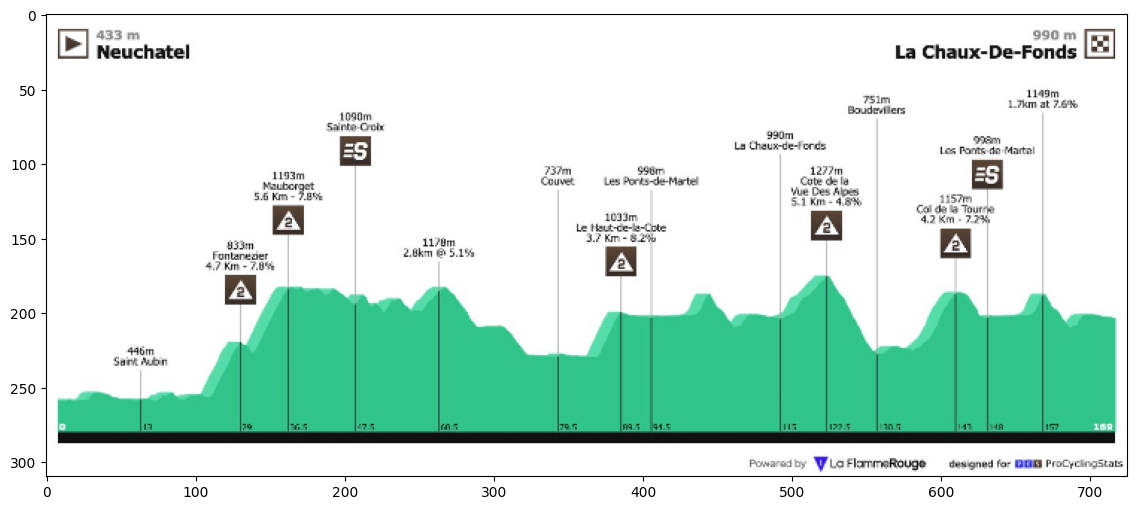

In [24]:
plt.figure(figsize=(20,6))
plt.imshow(ls[np.random.randint(0, 78)])